In [3]:
# This code will be used to analyze the output data from a scenario of the openMASTER model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def read_csv_files(path):
    # Dictionary to store DataFrames
    dataframes = {}

    # List all CSV files in the provided directory
    for file in os.listdir(path):
        if file.endswith('.csv'):
            # Create a DataFrame and store it in the dictionary
            file_path = os.path.join(path, file)  # Full path to file
            df_name = file[:-4]  # Remove .csv from filename to use as dictionary key
            dataframes[df_name] = pd.read_csv(file_path)

    return dataframes

Load data results and input parameters

In [4]:

data_results    = read_csv_files('../scenarios/Just_v1_19_09_2024-13_10_27_STPathway_v1.0.3/data/tmp/output/')
data_input      = read_csv_files('../scenarios/Just_v1_19_09_2024-13_10_27_STPathway_v1.0.3/data/tmp/input/')


Final energy consumption per sector for the calibration year

In [30]:
# Total Consumption by Sector
# Show all the rows in the df data_results['vQES'] that include in the column sES the value 'sES_DSOTH_RES' at the begining of the string and that the value in sYear is y2020
#Total_GWh_Households_ESSD = data_results['vQES'][(data_results['vQES'].sES.str.startswith('sES_DSOTH_RES')) & (data_results['vQES'].sYear=='y2020')].vQES.sum()                    # Calibracion en ES consumido por SDMD
# Total Consumption by Sector
# Show all the rows in the df data_results['vQES'] that include in the column sES the value 'sES_DSOTH_RES' at the beginning of the string and that the value in sYear is y2020
#Total_GWh_Households_ESSD = data_results['vQES'][(data_results['vQES'].sES.str.startswith('sES_DSOTH_RES')) & (data_results['vQES'].sYear=='y2020')].vQES.sum()                    # Calibracion en ES consumido por SDMD
Total_GWh_Households_TEST = data_results['vQSTInTE'].loc[
    (data_results['vQSTInTE'].sYear == 'y2020') & 
    (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES')), 
    'vQSTInTE'
].sum()

Total_GWh_Industry = data_results['vQSTInTE'].loc[
    (data_results['vQSTInTE'].sYear == 'y2020') & 
    (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND')), 
    'vQSTInTE'
].sum()

Total_GWh_Transport = data_results['vQSTInTE'].loc[
    (data_results['vQSTInTE'].sYear == 'y2020') & 
    (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA')), 
    'vQSTInTE'
].sum()

Total_GWh_Services = data_results['vQES'][
    (data_results['vQES'].sES.str.startswith('sES_DSOTH_SRV')) & 
    (data_results['vQES'].sYear == 'y2020')
].vQES.sum()

ES_NS = data_results['vQESNS'][(data_results['vQESNS'].sYear == 'y2020')].vQESNS.sum()

#print(f"Total_GWh_Households_ESSD:   {Total_GWh_Households_ESSD   }")
print(f"Total_GWh_Households_TEST:   {Total_GWh_Households_TEST   }")
print(f"Total_GWh_Industry:     {Total_GWh_Industry     }")
print(f"Total_GWh_Transport:    {Total_GWh_Transport    }")
print(f"Total_GWh_Services:     {Total_GWh_Services     }")
print(f"Energy Service Not Served for the calibration year: {ES_NS}")


Total_GWh_Households_TEST:   168829.2250326372
Total_GWh_Industry:     231552.63130958058
Total_GWh_Transport:    220575.60689743026
Total_GWh_Services:     87412.87107867762
Energy Service Not Served for the calibration year: 0.0


Primary energy consumption by sector at the entire time window

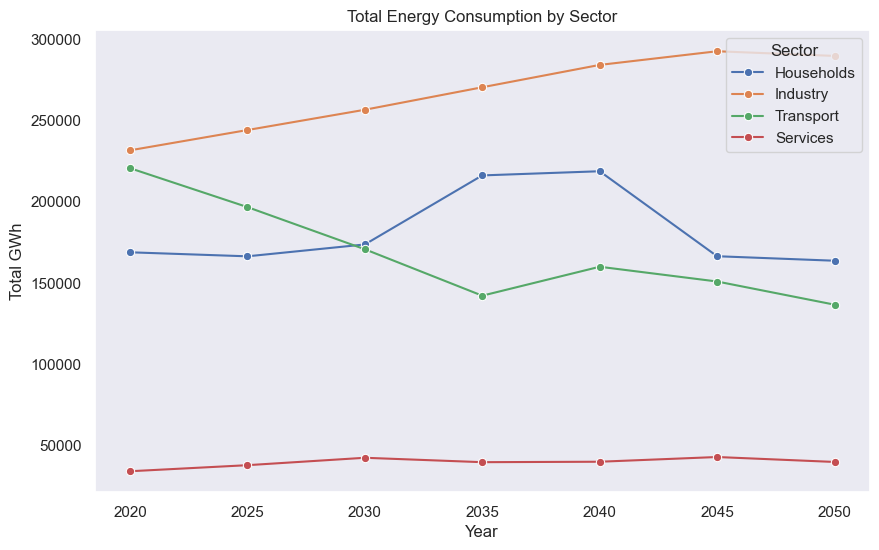

In [35]:
# Use vectorized operations for filtering and summing
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
households_mask = data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES')
industry_mask = data_results['vQSTInTE'].sST.str.startswith('sST_DSIND')
transport_mask = data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA')
services_mask = data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_SRV')

Total_GWh_Households_TEST = {year: data_results['vQSTInTE'].loc[(data_results['vQSTInTE'].sYear == year) & households_mask, 'vQSTInTE'].sum() for year in years}
Total_GWh_Industry = {year: data_results['vQSTInTE'].loc[(data_results['vQSTInTE'].sYear == year) & industry_mask, 'vQSTInTE'].sum() for year in years}
Total_GWh_Transport = {year: data_results['vQSTInTE'].loc[(data_results['vQSTInTE'].sYear == year) & transport_mask, 'vQSTInTE'].sum() for year in years}
Total_GWh_Services = {year: data_results['vQSTInTE'].loc[(data_results['vQSTInTE'].sYear == year) & services_mask, 'vQSTInTE'].sum() for year in years}

# Extract values for each year
Total_GWh_Households_TEST_2020 = Total_GWh_Households_TEST['y2020']
Total_GWh_Households_TEST_2025 = Total_GWh_Households_TEST['y2025']
Total_GWh_Households_TEST_2030 = Total_GWh_Households_TEST['y2030']
Total_GWh_Households_TEST_2035 = Total_GWh_Households_TEST['y2035']
Total_GWh_Households_TEST_2040 = Total_GWh_Households_TEST['y2040']
Total_GWh_Households_TEST_2045 = Total_GWh_Households_TEST['y2045']
Total_GWh_Households_TEST_2050 = Total_GWh_Households_TEST['y2050']

# Extract values for each year using vectorized operations
Total_GWh_Industry_2020 = Total_GWh_Industry['y2020']
Total_GWh_Industry_2025 = Total_GWh_Industry['y2025']
Total_GWh_Industry_2030 = Total_GWh_Industry['y2030']
Total_GWh_Industry_2035 = Total_GWh_Industry['y2035']
Total_GWh_Industry_2040 = Total_GWh_Industry['y2040']
Total_GWh_Industry_2045 = Total_GWh_Industry['y2045']
Total_GWh_Industry_2050 = Total_GWh_Industry['y2050']

Total_GWh_Transport_2020 = Total_GWh_Transport['y2020']
Total_GWh_Transport_2025 = Total_GWh_Transport['y2025']
Total_GWh_Transport_2030 = Total_GWh_Transport['y2030']
Total_GWh_Transport_2035 = Total_GWh_Transport['y2035']
Total_GWh_Transport_2040 = Total_GWh_Transport['y2040']
Total_GWh_Transport_2045 = Total_GWh_Transport['y2045']
Total_GWh_Transport_2050 = Total_GWh_Transport['y2050']

Total_GWh_Services_2020 = Total_GWh_Services['y2020']
Total_GWh_Services_2025 = Total_GWh_Services['y2025']
Total_GWh_Services_2030 = Total_GWh_Services['y2030']
Total_GWh_Services_2035 = Total_GWh_Services['y2035']
Total_GWh_Services_2040 = Total_GWh_Services['y2040']
Total_GWh_Services_2045 = Total_GWh_Services['y2045']
Total_GWh_Services_2050 = Total_GWh_Services['y2050']

# Plot the results

# Create a DataFrame with the results
df = pd.DataFrame({
    'Sector': ['Households', 'Industry', 'Transport', 'Services'],
    '2020': [Total_GWh_Households_TEST_2020, Total_GWh_Industry_2020, Total_GWh_Transport_2020, Total_GWh_Services_2020],
    '2025': [Total_GWh_Households_TEST_2025, Total_GWh_Industry_2025, Total_GWh_Transport_2025, Total_GWh_Services_2025],
    '2030': [Total_GWh_Households_TEST_2030, Total_GWh_Industry_2030, Total_GWh_Transport_2030, Total_GWh_Services_2030],
    '2035': [Total_GWh_Households_TEST_2035, Total_GWh_Industry_2035, Total_GWh_Transport_2035, Total_GWh_Services_2035],
    '2040': [Total_GWh_Households_TEST_2040, Total_GWh_Industry_2040, Total_GWh_Transport_2040, Total_GWh_Services_2040],
    '2045': [Total_GWh_Households_TEST_2045, Total_GWh_Industry_2045, Total_GWh_Transport_2045, Total_GWh_Services_2045],
    '2050': [Total_GWh_Households_TEST_2050, Total_GWh_Industry_2050, Total_GWh_Transport_2050, Total_GWh_Services_2050]
})

# Melt the DataFrame to plot it
df_melted = df.melt(id_vars='Sector', var_name='Year', value_name='Total GWh')
df_melted['Year'] = df_melted['Year'].astype(int)

# Plot the results
# sns.set_theme()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Year', y='Total GWh', hue='Sector', marker='o')
plt.title('Total Energy Consumption by Sector')
plt.ylabel('Total GWh')
plt.grid()
plt.show()


Shadow price of electricity

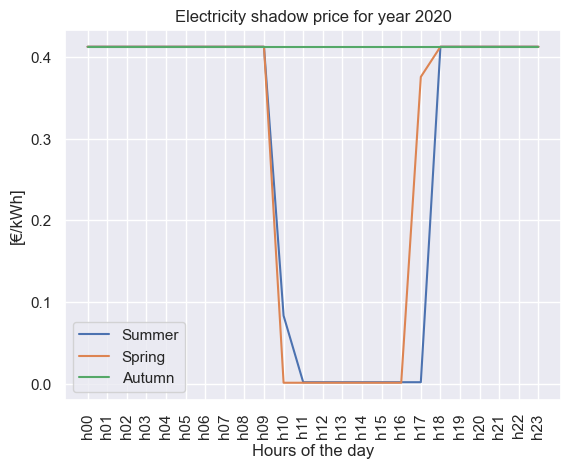

In [36]:
duals_EQ_TEBalance = data_results['duals_EQ_TEBalance']
# Preserve the values of sTE in duals_EQ_TEBalance that are equal to sTEELECE
df_summer = duals_EQ_TEBalance[duals_EQ_TEBalance.sTE.str.startswith('sTEELEOTH') & (duals_EQ_TEBalance.sYear == 'y2020') & (duals_EQ_TEBalance.sSeason == 'R')]
df_spring = duals_EQ_TEBalance[duals_EQ_TEBalance.sTE.str.startswith('sTEELEOTH') & (duals_EQ_TEBalance.sYear == 'y2020') & (duals_EQ_TEBalance.sSeason == 'S')]
df_fall   = duals_EQ_TEBalance[duals_EQ_TEBalance.sTE.str.startswith('sTEELEOTH') & (duals_EQ_TEBalance.sYear == 'y2020') & (duals_EQ_TEBalance.sSeason == 'F')]
df_winter = duals_EQ_TEBalance[duals_EQ_TEBalance.sTE.str.startswith('sTEELEOTH') & (duals_EQ_TEBalance.sYear == 'y2020') & (duals_EQ_TEBalance.sSeason == 'W')]

plt.plot(df_summer.sHour, df_summer.dual_value*-1000)
plt.plot(df_spring.sHour, df_spring.dual_value*-1000)
plt.plot(df_fall.sHour, df_fall.dual_value*-1000)
# plt.plot(df_winter.sHour, df_winter.dual_value*-1000)

plt.xticks(rotation=90)

plt.ylabel('[€/kWh]')
plt.xlabel('Hours of the day')
plt.title('Electricity shadow price for year 2020')
plt.legend(['Summer', 'Spring', 'Autumn', 'Winter'])


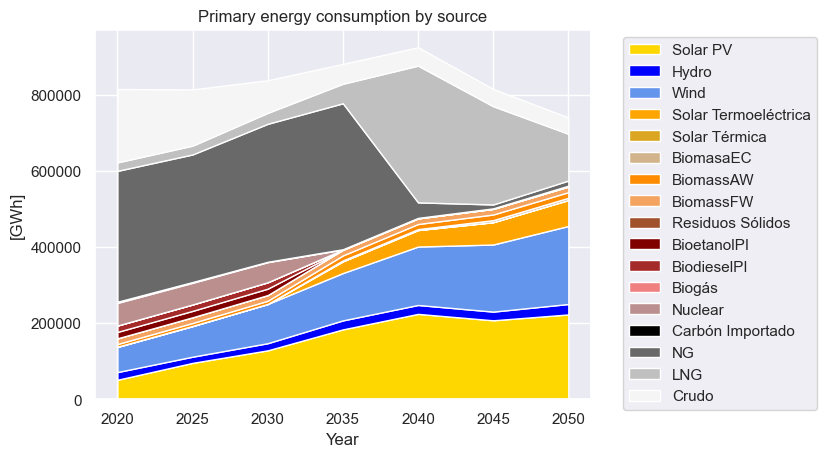

In [37]:
# Total Consumption by Sector
y2020solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solpv=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050wind=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEWINON')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solth=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solte=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomec=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomaw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomfw=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050swast=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPESWAST')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050bioethpi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biodiepi=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biogas=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050hydro=data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum() + data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (data_results['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050nuclear=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (data_results['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050impcoal=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (data_results['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050nagas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (data_results['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050lngas=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (data_results['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050croil=data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith('sPECROIL')) & (data_results['vQPEImp'].sYear=='y2050')].vQPEImp.sum()




#Visualize the results in a bar plot for each year unstacking the results for Solar PV and Hydro
import matplotlib.pyplot as plt
import numpy as np

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
solpv = [y2020solpv, y2025solpv, y2030solpv, y2035solpv, y2040solpv, y2045solpv, y2050solpv]
hydro = [y2020hydro, y2025hydro, y2030hydro, y2035hydro, y2040hydro, y2045hydro, y2050hydro]
wind = [y2020wind, y2025wind, y2030wind, y2035wind, y2040wind, y2045wind, y2050wind]
solte = [y2020solte, y2025solte, y2030solte, y2035solte, y2040solte, y2045solte, y2050solte]
solth = [y2020solth, y2025solth, y2030solth, y2035solth, y2040solth, y2045solth, y2050solth]
biomec = [y2020biomec, y2025biomec, y2030biomec, y2035biomec, y2040biomec, y2045biomec, y2050biomec]
biomaw = [y2020biomaw, y2025biomaw, y2030biomaw, y2035biomaw, y2040biomaw, y2045biomaw, y2050biomaw]
biomfw = [y2020biomfw, y2025biomfw, y2030biomfw, y2035biomfw, y2040biomfw, y2045biomfw, y2050biomfw]
swast = [y2020swast, y2025swast, y2030swast, y2035swast, y2040swast, y2045swast, y2050swast]
bioethpi = [y2020bioethpi, y2025bioethpi, y2030bioethpi, y2035bioethpi, y2040bioethpi, y2045bioethpi, y2050bioethpi]
biodiepi = [y2020biodiepi, y2025biodiepi, y2030biodiepi, y2035biodiepi, y2040biodiepi, y2045biodiepi, y2050biodiepi]
biogas = [y2020biogas, y2025biogas, y2030biogas, y2035biogas, y2040biogas, y2045biogas, y2050biogas]
nuclear = [y2020nuclear, y2025nuclear, y2030nuclear, y2035nuclear, y2040nuclear, y2045nuclear, y2050nuclear]
impcoal = [y2020impcoal, y2025impcoal, y2030impcoal, y2035impcoal, y2040impcoal, y2045impcoal, y2050impcoal]
nagas = [y2020nagas, y2025nagas, y2030nagas, y2035nagas, y2040nagas, y2045nagas, y2050nagas]
lngas = [y2020lngas, y2025lngas, y2030lngas, y2035lngas, y2040lngas, y2045lngas, y2050lngas]
croil = [y2020croil, y2025croil, y2030croil, y2035croil, y2040croil, y2045croil, y2050croil]


# Graph in a bar stack plot with different colors for each energy source
# fig, ax = plt.subplots()
# barWidth = 0.85
# plt.bar(years, solpv, color='gold', width=barWidth)
# plt.bar(years, hydro, bottom=solpv, color='blue', width=barWidth)
# plt.bar(years, wind, bottom=np.array(solpv)+np.array(hydro), color='cornflowerblue', width=barWidth)
# plt.bar(years, solte, bottom=np.array(solpv)+np.array(hydro)+np.array(wind), color='orange', width=barWidth)
# plt.bar(years, solth, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte), color='goldenrod', width=barWidth)
# plt.bar(years, biomec, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth), color='tan', width=barWidth)
# plt.bar(years, biomaw, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec), color='darkorange', width=barWidth)
# plt.bar(years, biomfw, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw), color='sandybrown', width=barWidth)
# plt.bar(years, swast, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw), color='sienna', width=barWidth)
# plt.bar(years, bioethpi, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast), color='maroon', width=barWidth)
# plt.bar(years, biodiepi, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi), color='brown', width=barWidth)
# plt.bar(years, biogas, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi), color='lightcoral', width=barWidth)
# plt.bar(years, nuclear, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi)+np.array(biogas), color='rosybrown', width=barWidth)
# plt.bar(years, impcoal, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi)+np.array(biogas)+np.array(nuclear), color='black', width=barWidth)
# plt.bar(years, nagas, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi)+np.array(biogas)+np.array(nuclear)+np.array(impcoal), color='dimgray',  width=barWidth)
# plt.bar(years, lngas, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi)+np.array(biogas)+np.array(nuclear)+np.array(impcoal)+np.array(nagas), color='silver', width=barWidth)
# plt.bar(years, croil, bottom=np.array(solpv)+np.array(hydro)+np.array(wind)+np.array(solte)+np.array(solth)+np.array(biomec)+np.array(biomaw)+np.array(biomfw)+np.array(swast)+np.array(bioethpi)+np.array(biodiepi)+np.array(biogas)+np.array(nuclear)+np.array(impcoal)+np.array(nagas)+np.array(lngas), color='whitesmoke',  width=barWidth)

# plt.plot([Total_GWh_Households_TEST_2020,Total_GWh_Households_TEST_2025,Total_GWh_Households_TEST_2030,Total_GWh_Households_TEST_2035,Total_GWh_Households_TEST_2040,Total_GWh_Households_TEST_2045,Total_GWh_Households_TEST_2050], color='black', label='Residential consumption', linewidth=2, linestyle='dashed',marker='o', markersize=5)
# plt.plot([Total_GWh_Industry_2020,Total_GWh_Industry_2025,Total_GWh_Industry_2030,Total_GWh_Industry_2035,Total_GWh_Industry_2040,Total_GWh_Industry_2045,Total_GWh_Industry_2050],color='cyan', label='Residential consumption', linewidth=2, linestyle='dashed',marker='o', markersize=5)
# plt.plot([Total_GWh_Transport_2020,Total_GWh_Transport_2025,Total_GWh_Transport_2030,Total_GWh_Transport_2035,Total_GWh_Transport_2040,Total_GWh_Transport_2045,Total_GWh_Transport_2050],color='green', label='Residential consumption', linewidth=2, linestyle='dashed',marker='o', markersize=5)
# plt.plot([Total_GWh_Services_2020,Total_GWh_Services_2025,Total_GWh_Services_2030,Total_GWh_Services_2035,Total_GWh_Services_2040,Total_GWh_Services_2045,Total_GWh_Services_2050],color='red', label='Services sector consumption', linewidth=2, linestyle='dashed',marker='o', markersize=5)

plt.stackplot(years, solpv, hydro, wind, solte, solth, biomec, biomaw, biomfw, swast, bioethpi, biodiepi, biogas, nuclear, impcoal, nagas, lngas, croil, colors=['gold', 'blue', 'cornflowerblue', 'orange', 'goldenrod', 'tan', 'darkorange', 'sandybrown', 'sienna', 'maroon', 'brown', 'lightcoral', 'rosybrown', 'black', 'dimgray', 'silver', 'whitesmoke'])
# Add a legend outside of the plot
plt.title('Primary energy consumption by source')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend(['Solar PV', 'Hydro', 'Wind', 'Solar Termoeléctrica', 'Solar Térmica', 'BiomasaEC', 'BiomassAW', 'BiomassFW', 'Residuos Sólidos', 'BioetanolPI', 'BiodieselPI', 'Biogás', 'Nuclear', 'Carbón Importado', 'NG', 'LNG', 'Crudo'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




# plt.plot(years, solpv, label='Solar PV',color='yellow')
# plt.plot(years, hydro, label='Hydro',color='blue')
# plt.plot(years, wind, label='Wind',color='green')
# plt.plot(years,solte, label='Solar Termoeléctrica',color='orange')
# plt.plot(years,solth, label='Solar Térmica',color='red')
# plt.plot(years,biomec, label='BiomasaEC',color='purple')
# plt.plot(years,biomaw, label='BiomassAW',color='pink')
# plt.plot(years,biomfw, label='BiomassFW')
# plt.plot(years,swast, label='Residuos Sólidos')
# plt.plot(years,bioethpi, label='BioetanolPI')
# plt.plot(years,biodiepi, label='BiodieselPI')
# plt.plot(years,biogas, label='Biogás')
# plt.plot(years,nuclear, label='Nuclear')
# plt.plot(years,impcoal, label='Carbón Importado',color='black')
# plt.plot(years,nagas, label='NG')
# plt.plot(years,lngas, label='LPG')
# plt.plot(years,croil, label='Crudo')
# plt.xlabel('Year')
# plt.ylabel('[GWh]')
# plt.title('Primary energy')
# Add a legend outside of the plot
# Change the color of the plots to gradient of blue

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.show()


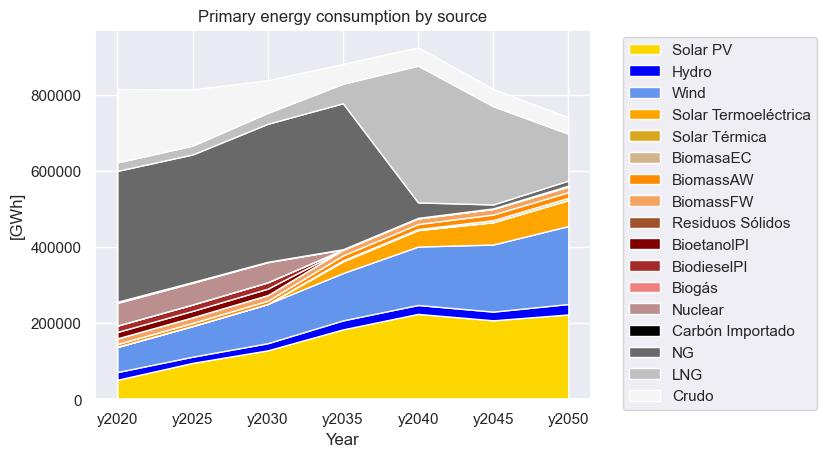

In [33]:
# Total Consumption by Sector
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
sectors = {
    'solpv': 'sPESOLPV',
    'wind': 'sPEWINON',
    'solth': 'sPESOLTH',
    'solte': 'sPESOLTE',
    'biomec': 'sPEBIOMEC',
    'biomaw': 'sPEBIOMAW',
    'biomfw': 'sPEBIOMFW',
    'swast': 'sPESWAST',
    'bioethpi': 'sPEBIOETHPI',
    'biodiepi': 'sPEBIODIEPI',
    'biogas': 'sPEBIOGAS',
    'hydro': ['sPEHYDRR', 'sPEHYDRC', 'sPEMNHYDR'],
    'nuclear': 'sPENUCLE',
    'impcoal': 'sPEIMPCO',
    'nagas': 'sPENAGAS',
    'lngas': 'sPELNGAS',
    'croil': 'sPECROIL'
}

# Function to calculate sum for each sector and year
def calculate_sum(sector, year):
    if isinstance(sector, list):
        return sum(data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith(s)) & (data_results['vQPEDom'].sYear == year)].vQPEDom.sum() +  data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith(s)) & (data_results['vQPEImp'].sYear == year)].vQPEImp.sum() for s in sector)
    return data_results['vQPEDom'][(data_results['vQPEDom'].sPE.str.startswith(sector)) & (data_results['vQPEDom'].sYear == year)].vQPEDom.sum() + data_results['vQPEImp'][(data_results['vQPEImp'].sPE.str.startswith(sector)) & (data_results['vQPEImp'].sYear == year)].vQPEImp.sum()

# Dictionary to store results
results = {sector: [calculate_sum(sectors[sector], year) for year in years] for sector in sectors}


# Visualize the results in a bar plot for each year unstacking the results for Solar PV and Hydro
import matplotlib.pyplot as plt
import numpy as np

# Extracting the results for plotting
solpv = results['solpv']
hydro = results['hydro']
wind = results['wind']
solte = results['solte']
solth = results['solth']
biomec = results['biomec']
biomaw = results['biomaw']
biomfw = results['biomfw']
swast = results['swast']
bioethpi = results['bioethpi']
biodiepi = results['biodiepi']
biogas = results['biogas']
nuclear = results['nuclear']
impcoal = results['impcoal']
nagas = results['nagas']
lngas = results['lngas']
croil = results['croil']

# Graph in a bar stack plot with different colors for each energy source
plt.stackplot(years, solpv, hydro, wind, solte, solth, biomec, biomaw, biomfw, swast, bioethpi, biodiepi, biogas, nuclear, impcoal, nagas, lngas, croil, colors=['gold', 'blue', 'cornflowerblue', 'orange', 'goldenrod', 'tan', 'darkorange', 'sandybrown', 'sienna', 'maroon', 'brown', 'lightcoral', 'rosybrown', 'black', 'dimgray', 'silver', 'whitesmoke'])
# Add a legend outside of the plot
plt.title('Primary energy consumption by source')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend(['Solar PV', 'Hydro', 'Wind', 'Solar Termoeléctrica', 'Solar Térmica', 'BiomasaEC', 'BiomassAW', 'BiomassFW', 'Residuos Sólidos', 'BioetanolPI', 'BiodieselPI', 'Biogás', 'Nuclear', 'Carbón Importado', 'NG', 'LNG', 'Crudo'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Primary energy consumption by source

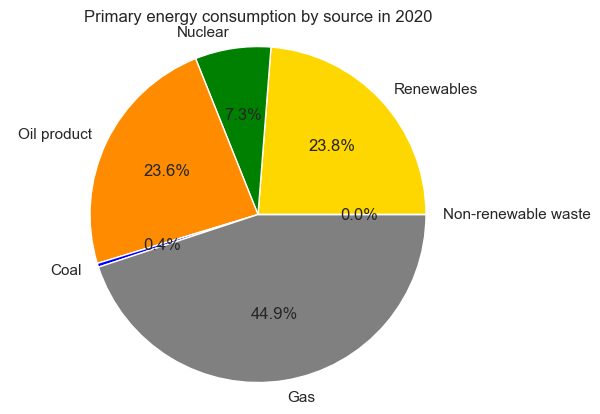

In [39]:
# Now make a pie chart for the year 2020 with the primary energy consumption by source
# Consider 6 sources: Renewables = Solar PV + Hydro + Wind + Solar Termoeléctrica + Solar Térmica + BiomasaEC + BiomassAW + BiomassFW + BioetanolPI + BiodieselPI + Biogás
# Nuclear = Nuclear
# Fossil =  Crudo
# Coal = Carbón Importado
# Gas = NG + LNG
# Non-renewable waste = Residuos Sólidos

# Calculate the total primary energy consumption for 2020
total_2020 = y2020solpv + y2020hydro + y2020wind + y2020solte + y2020solth + y2020biomec + y2020biomaw + y2020biomfw + y2020swast + y2020bioethpi + y2020biodiepi + y2020biogas + y2020nuclear + y2020impcoal + y2020nagas + y2020lngas + y2020croil

# Calculate the percentage of each source
renewables = (y2020solpv + y2020hydro + y2020wind + y2020solte + y2020solth + y2020biomec + y2020biomaw + y2020biomfw + y2020bioethpi + y2020biodiepi + y2020biogas) / total_2020
nuclear = y2020nuclear / total_2020
fossil = y2020croil / total_2020
coal = y2020impcoal / total_2020
gas = (y2020nagas + y2020lngas) / total_2020
non_renewable_waste = y2020swast / total_2020

# Create a pie chart
labels = ['Renewables', 'Nuclear', 'Oil product', 'Coal', 'Gas', 'Non-renewable waste']
sizes = [renewables, nuclear, fossil, coal, gas, non_renewable_waste]
colors = ['gold', 'green', 'darkorange', 'blue', 'grey', 'lightblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Primary energy consumption by source in 2020')
plt.show()


Energy imported for all years

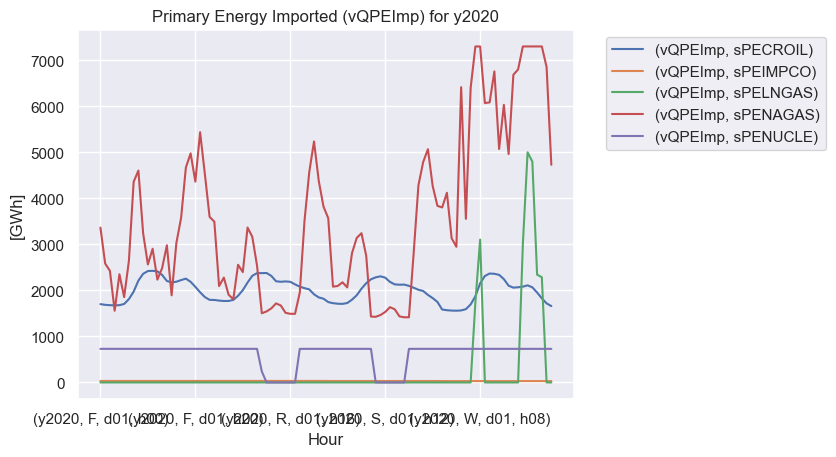

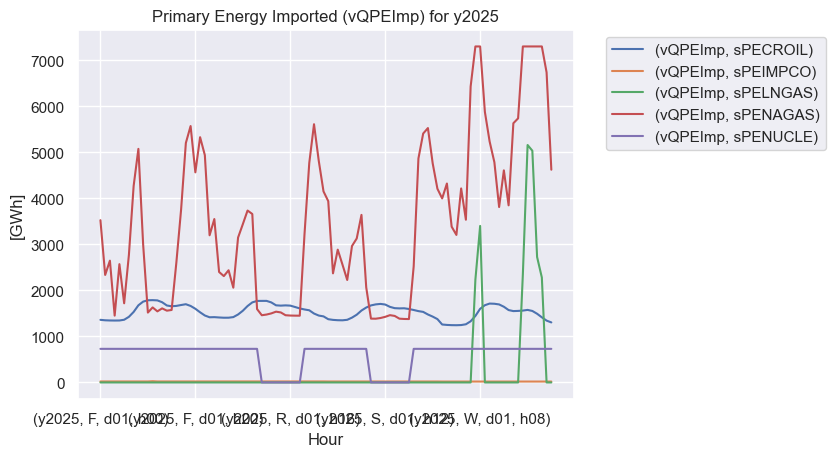

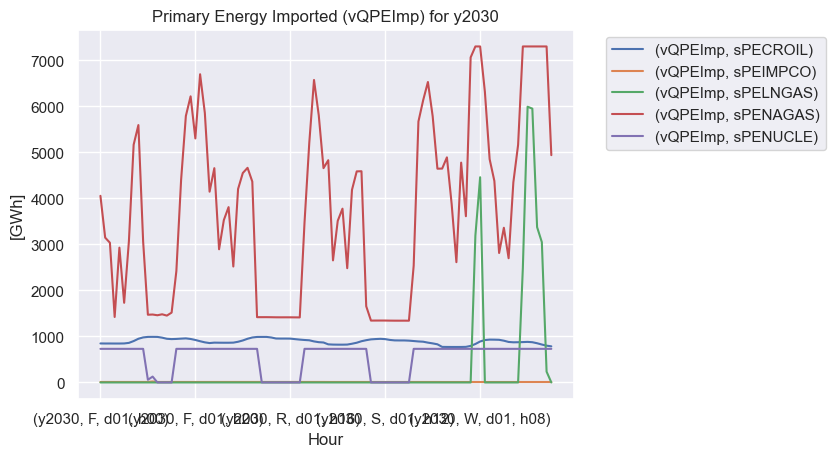

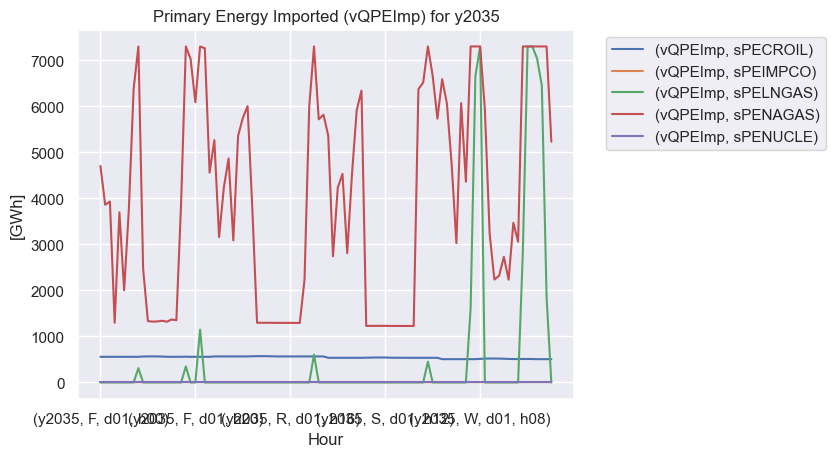

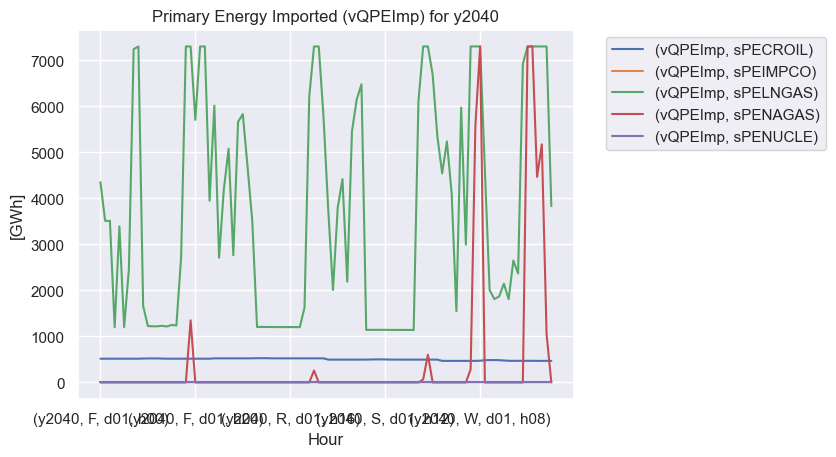

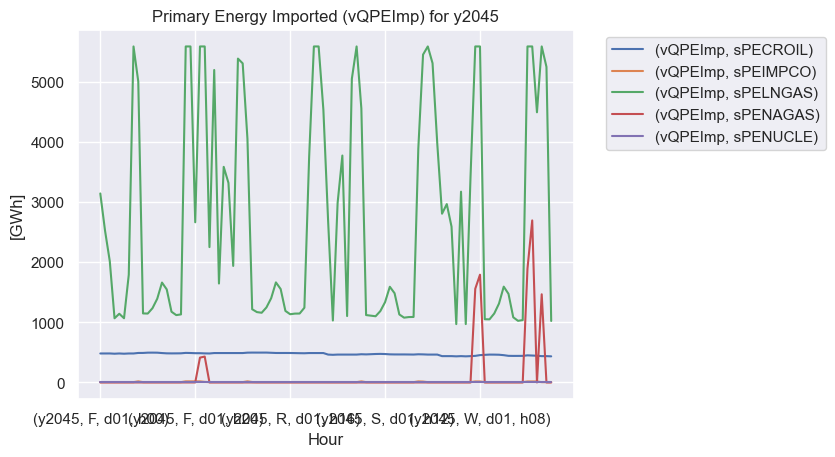

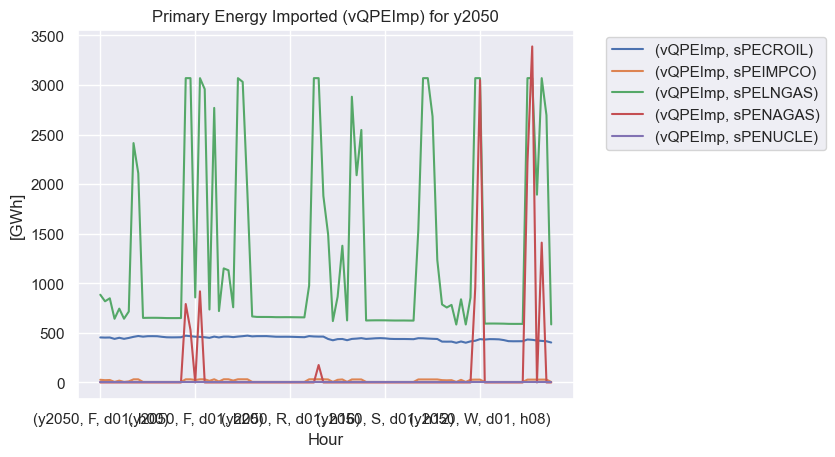

In [42]:
# Filter data for each year once
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
pe_imp_data = {year: data_results['vQPEImp'][data_results['vQPEImp'].sYear == year] for year in years}

# Define the list of prefixes to drop
drop_prefixes = ['sPEHYDRR', 'sPEHYDRC', 'sPEMNHY', 'sPEWINON', 'sPEWINOF', 'sPESOLPV', 'sPESOLTE', 'sPESOLTH', 'sPEBIOMEC', 'sPEBIOMAW', 'sPEBIOMFW', 'sPESWAST', 'sPEBIOETHPI', 'sPEBIODIEPI', 'sPEBIOGAS', 'sPEHUMANE']

# Function to filter out rows with specified prefixes
def filter_prefixes(df, prefixes):
    mask = ~df.sPE.str.startswith(tuple(prefixes))
    return df[mask]

# Apply the filter to each year's data
pe_imp_filtered = {year: filter_prefixes(pe_imp_data[year], drop_prefixes) for year in years}

# Set index and plot for each year
for year in years:
    pe_imp_filtered[year] = pe_imp_filtered[year].set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
    pe_imp_filtered[year].unstack('sPE').plot()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Primary Energy Imported (vQPEImp) for {year}')
    plt.ylabel('[GWh]')
    plt.xlabel('Hour')
    plt.show()


Primary energy produced at the domestic level

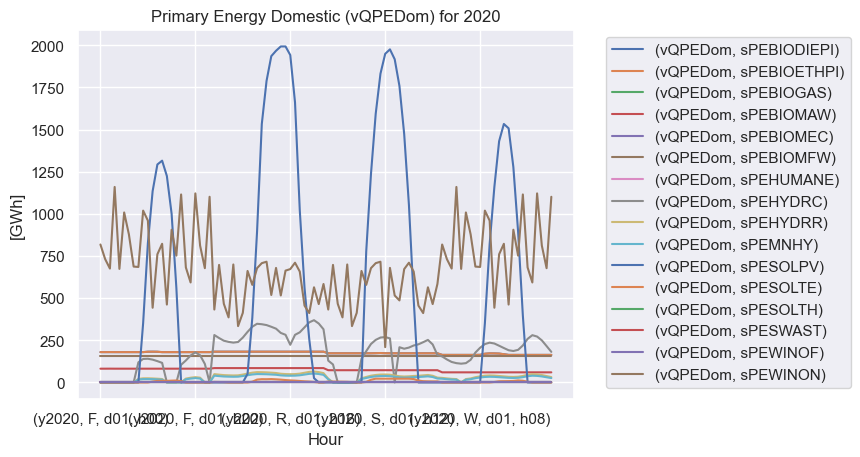

In [48]:
# Filter data for primary energy domestic capacity once
filtered_PEDom = data_results['vQPEDom'][~data_results['vQPEDom'].sPE.str.startswith(('sPENUCLE', 'sPEIMPCO', 'sPENAGAS', 'sPELNGAS', 'sPECROIL'))]

# Split the filtered data by year
PEDom_by_year = {year: filtered_PEDom[filtered_PEDom.sYear == year] for year in ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']}

# Set index and plot for the year 2020
y2020_PEDom = PEDom_by_year['y2020'].set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2020_PEDom.unstack('sPE').plot()

# Put legend outside of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Primary Energy Domestic (vQPEDom) for 2020')
plt.ylabel('[GWh]')
plt.xlabel('Hour')
plt.show()


Total cost per year

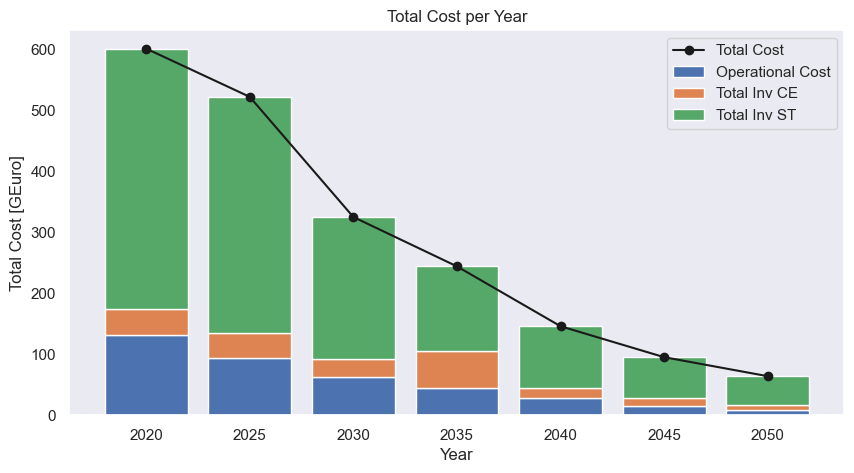

In [50]:
# Group by 'sYear' and aggregate the sums for each cost type
total_costs = data_results['vTotalCost'].groupby('sYear').vTotalCost.sum()
op_costs = data_results['vOpCost'].groupby('sYear').vOpCost.sum()
inv_cost_ce = data_results['vInvCostCE'].groupby('sYear').vInvCostCE.sum()
inv_cost_st = data_results['vInvCostST'].groupby('sYear').vInvCostST.sum()

# Extract the values for each year
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
TotalCost = [total_costs[f'y{year}'] for year in years]
OperationalCost = [1e-3 * op_costs[f'y{year}'] for year in years]
TotalInvCE = [inv_cost_ce[f'y{year}'] for year in years]
TotalInvST = [inv_cost_st[f'y{year}'] for year in years]

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost, 'ko-')
plt.bar(years, OperationalCost)
plt.bar(years, TotalInvCE, bottom=OperationalCost)
plt.bar(years, TotalInvST, bottom=np.array(OperationalCost) + np.array(TotalInvCE))
plt.title('Total Cost per Year')
plt.legend(['Total Cost', 'Operational Cost', 'Total Inv CE', 'Total Inv ST'])
plt.xlabel('Year')
plt.ylabel('Total Cost [GEuro]')
plt.grid()
plt.show()


Total operational costs per year

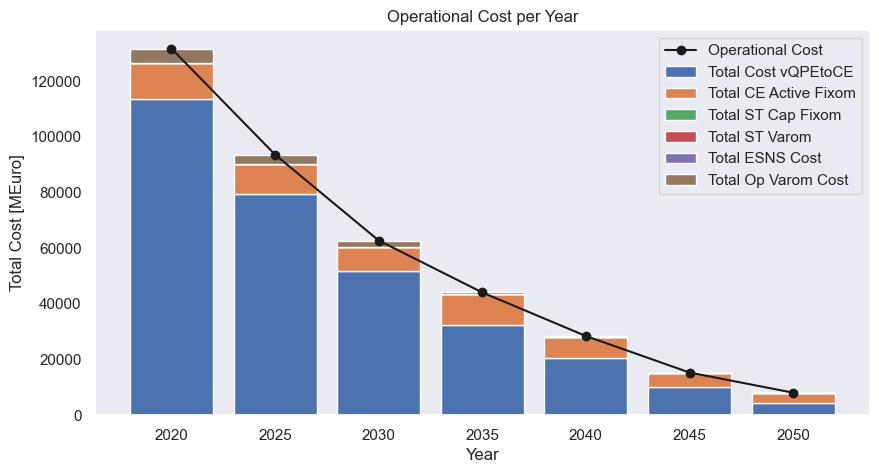

In [55]:


# Set index for required dataframes
pPECost = data_input['pPECost'].set_index('sPE')
pCEFixom = data_input['pCEFixom'].set_index('sCE')
pSTFixom = data_input['pSTFixom'].set_index('sST')
pSTVarom = data_input['pSTVarom'].set_index(['sST', 'sES'])
pESNSCost = data_input['pESNSCost'].pESNSCost.sum()

YrGap = data_input['pYrGap'].pYrGap.sum()
DisRate = data_input['pDisRate'].pDisRate.sum()

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
op_costs = []
total_cost_vQPEtoCE = []
total_CE_active_fixom_cost = []
total_ST_cap_fixom = []
total_varom_ST_cost = []
total_ESNS_cost = []
total_op_varom_cost = []

for year in years:
    y_op_cost = data_results['vOpCost'][data_results['vOpCost'].sYear == f'y{year}'].vOpCost.sum()
    op_costs.append(y_op_cost)

    vQPEImp = data_results['vQPEImp'][data_results['vQPEImp'].sYear == f'y{year}'].groupby('sPE').sum().vQPEImp
    vQPEDom = data_results['vQPEDom'][data_results['vQPEDom'].sYear == f'y{year}'].groupby('sPE').sum().vQPEDom
    total_cost_vQPEtoCE.append(((vQPEImp + vQPEDom) * pPECost[pPECost.sYear == f'y{year}'].pPECost).sum() * YrGap * (1 / ((1 + DisRate) ** (YrGap * (years.index(year))))))
    
    vCEActCap = data_results['vCEActCap'][data_results['vCEActCap'].sYear == f'y{year}'].groupby('sCE').sum().vCEActCap
    total_CE_active_fixom_cost.append((vCEActCap * pCEFixom.pCEFixom).sum() * YrGap * (1 / ((1 + DisRate) ** (YrGap * (years.index(year))))))

    vSTTotCap = data_results['vSTTotCap'][data_results['vSTTotCap'].sYear == f'y{year}'].groupby('sST').sum().vSTTotCap
    total_ST_cap_fixom.append((vSTTotCap * pSTFixom.pSTFixom).sum() * 1e-6)

    vQSTOut = data_results['vQSTOut'][data_results['vQSTOut'].sYear == f'y{year}'].groupby(['sST', 'sES']).sum().vQSTOut
    pSTVarom_ALIGNED = pSTVarom.reindex(vQSTOut.index)
    total_varom_ST_cost.append((pSTVarom_ALIGNED['pSTVarom'] * vQSTOut * YrGap * (1 / ((1 + DisRate) ** (YrGap * (years.index(year)))))).sum() * 1e-6)

    vQESNS = data_results['vQESNS'][data_results['vQESNS'].sYear == f'y{year}'].groupby(['sST', 'sES']).sum().vQESNS
    total_ESNS_cost.append((vQESNS.sum() * pESNSCost * YrGap * (1 / ((1 + DisRate) ** (YrGap * (years.index(year)))))))

    vOpVarom = data_results['vOpVarom'][data_results['vOpVarom'].sYear == f'y{year}'].vOpVarom.sum()
    total_op_varom_cost.append(vOpVarom * YrGap * (1 / ((1 + DisRate) ** (YrGap * (years.index(year))))))

# Convert to appropriate units
total_cost_vQPEtoCE = [1e-3 * cost for cost in total_cost_vQPEtoCE]
total_op_varom_cost = [1e-3 * cost for cost in total_op_varom_cost]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(years, op_costs, 'ko-')
plt.bar(years, total_cost_vQPEtoCE)
plt.bar(years, total_CE_active_fixom_cost, bottom=total_cost_vQPEtoCE)
plt.bar(years, total_ST_cap_fixom, bottom=np.array(total_cost_vQPEtoCE) + np.array(total_CE_active_fixom_cost))
plt.bar(years, total_varom_ST_cost, bottom=np.array(total_cost_vQPEtoCE) + np.array(total_CE_active_fixom_cost) + np.array(total_ST_cap_fixom))
plt.bar(years, total_ESNS_cost, bottom=np.array(total_cost_vQPEtoCE) + np.array(total_CE_active_fixom_cost) + np.array(total_ST_cap_fixom) + np.array(total_varom_ST_cost))
plt.bar(years, total_op_varom_cost, bottom=np.array(total_cost_vQPEtoCE) + np.array(total_CE_active_fixom_cost) + np.array(total_ST_cap_fixom) + np.array(total_varom_ST_cost) + np.array(total_ESNS_cost))
plt.title('Operational Cost per Year')
plt.legend(['Operational Cost', 'Total Cost vQPEtoCE', 'Total CE Active Fixom', 'Total ST Cap Fixom', 'Total ST Varom', 'Total ESNS Cost', 'Total Op Varom Cost'])
plt.xlabel('Year')
plt.ylabel('Total Cost [MEuro]')
plt.grid()
plt.show()


Primary energy operational costs

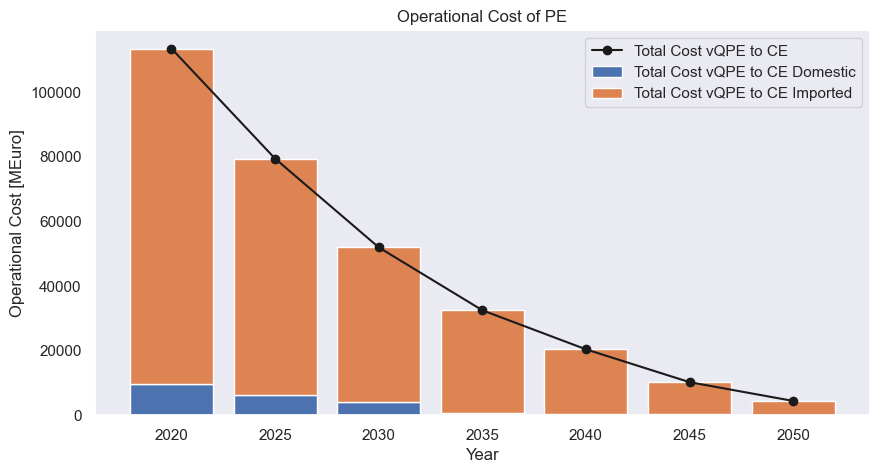

In [60]:


TotalCost_vQPEtoCE2020_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2020')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2020'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCost_vQPEtoCE2025_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2025')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2025'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCost_vQPEtoCE2030_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2030')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2030'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCost_vQPEtoCE2035_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2035')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2035'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCost_vQPEtoCE2040_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2040')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2040'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCost_vQPEtoCE2045_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2045')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2045'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCost_vQPEtoCE2050_Imported = (data_results['vQPEImp'][(data_results['vQPEImp'].sYear=='y2050')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2050'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

TotalCost_vQPEtoCE2020_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2020')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2020'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCost_vQPEtoCE2025_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2025')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2025'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCost_vQPEtoCE2030_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2030')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2030'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCost_vQPEtoCE2035_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2035')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2035'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCost_vQPEtoCE2040_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2040')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2040'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCost_vQPEtoCE2045_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2045')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2045'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCost_vQPEtoCE2050_Domestic = (data_results['vQPEDom'][(data_results['vQPEDom'].sYear=='y2050')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2050'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

# Now lets graph the operational costs of PE
years                       = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
TotalCost_vQPEtoCE_Imported = [1e-3*TotalCost_vQPEtoCE2020_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2025_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2030_Imported.sum(),1e-3* TotalCost_vQPEtoCE2035_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2040_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2045_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2050_Imported.sum()]
TotalCost_vQPEtoCE_Domestic = [1e-3*TotalCost_vQPEtoCE2020_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2025_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2030_Domestic.sum(),1e-3* TotalCost_vQPEtoCE2035_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2040_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2045_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2050_Domestic.sum()]
TotalCost_vQPEtoCE          = [1e-3*TotalCost_vQPEtoCE2020.sum(), 1e-3*TotalCost_vQPEtoCE2025.sum(), 1e-3*TotalCost_vQPEtoCE2030.sum(),1e-3* TotalCost_vQPEtoCE2035.sum(), 1e-3*TotalCost_vQPEtoCE2040.sum(), 1e-3*TotalCost_vQPEtoCE2045.sum(), 1e-3*TotalCost_vQPEtoCE2050.sum()]

plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost_vQPEtoCE, 'ko-')
plt.bar(years, TotalCost_vQPEtoCE_Domestic)
plt.bar(years, TotalCost_vQPEtoCE_Imported, bottom=TotalCost_vQPEtoCE_Domestic)
plt.title('Operational Cost of PE')
plt.legend(['Total Cost vQPE to CE','Total Cost vQPE to CE Domestic', 'Total Cost vQPE to CE Imported'])
plt.xlabel('Year')
plt.ylabel('Operational Cost [MEuro]')
plt.grid()

Total investment per year in CE

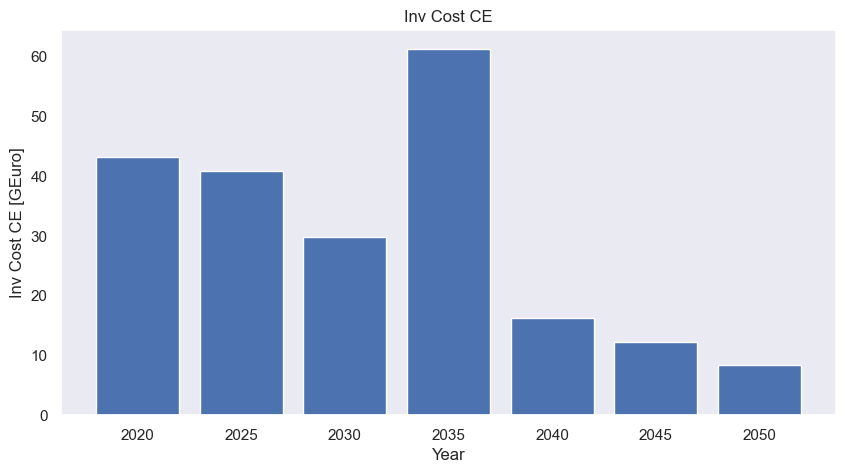

In [64]:
# InvCostCE
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
invCE_values = [data_results['vInvCostCE'][data_results['vInvCostCE'].sYear == year].vInvCostCE.sum() for year in years]

# Convert years to a more readable format for plotting
years_readable = [year[1:] for year in years]

plt.figure(figsize=(10, 5))
plt.bar(years_readable, invCE_values)
plt.title('Inv Cost CE')
plt.xlabel('Year')
plt.ylabel('Inv Cost CE [GEuro]')
plt.grid()
plt.show()


Total investment in ST

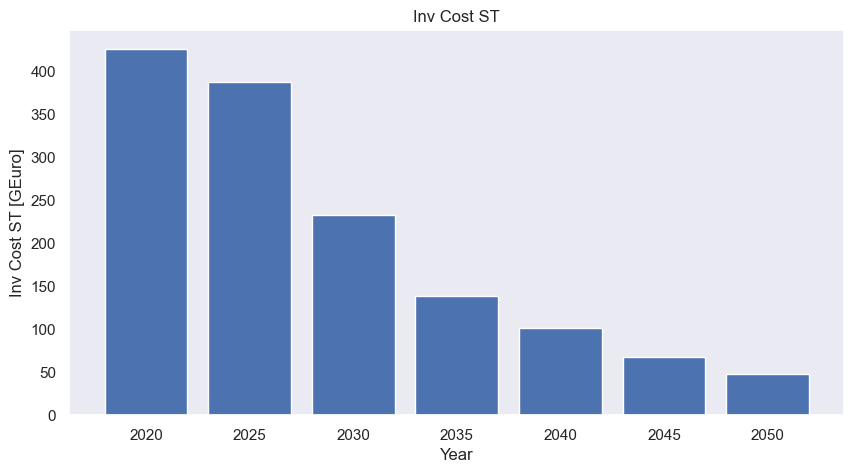

In [65]:
# InvCostST
# Now lets graph the investment costs for supply technologies

# List of years
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']

# Calculate investment costs for each year
invST_values = [data_results['vInvCostST'][data_results['vInvCostST'].sYear == year].vInvCostST.sum() for year in years]

# Convert years to a more readable format for plotting
years_readable = [year[1:] for year in years]

plt.figure(figsize=(10, 5))
plt.bar(years_readable, invST_values)
plt.title('Inv Cost ST')
plt.xlabel('Year')
plt.ylabel('Inv Cost ST [GEuro]')
plt.grid()
plt.show()



Total installed capacity in GW by technology and year

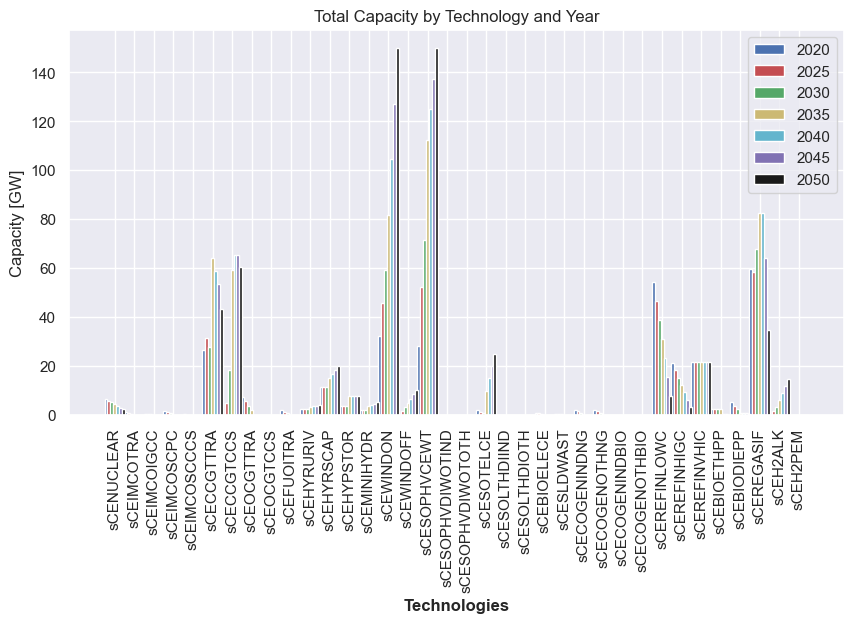

In [67]:
# Define a function to filter and process the data
def process_data(year):
    data = data_results['vCETotCap'][data_results['vCETotCap'].sYear == year]
    data = data[~data.sCE.str.startswith(('sPE2TE', 'sTE2TE'))]
    data = data.drop(columns=['sYear']).set_index('sCE')
    return data

# Process data for each year
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
data_by_year = {year: process_data(year) for year in years}

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r = np.arange(len(data_by_year['y2020']))
positions = [r + i * barWidth for i in range(len(years))]

# Define colors for each year
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k']

# Make the plot
for i, year in enumerate(years):
    plt.bar(positions[i], data_by_year[year].vCETotCap, color=colors[i], width=barWidth, label=year[1:])

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth * (len(years) - 1) / 2 for r in range(len(data_by_year['y2020']))], data_by_year['y2020'].index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Total Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.show()


Decommisioned capacity per technology and year

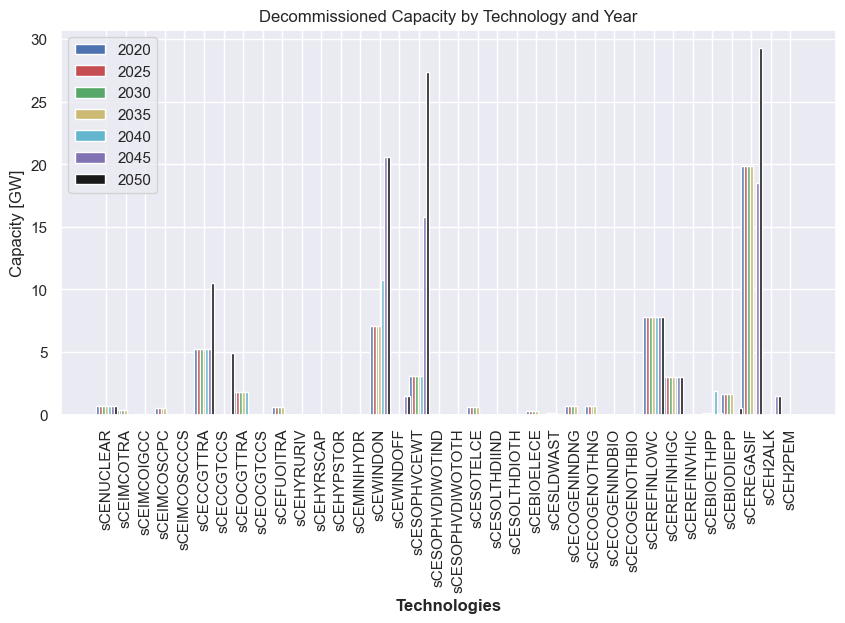

In [69]:
# Decommissioned capacity by technology and year
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
filtered_data = {}

# Filter and process the data for each year
for year in years:
    data = data_results['vCEDecCap'][data_results['vCEDecCap'].sYear == year]
    data = data[~data.sCE.str.startswith(('sPE2TE', 'sTE2TE'))]
    data = data.drop(columns=['sYear']).set_index('sCE')
    filtered_data[year] = data

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
positions = [np.arange(len(filtered_data['y2020'])) + i * barWidth for i in range(len(years))]

# Define colors for each year
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k']

# Make the plot
for i, year in enumerate(years):
    plt.bar(positions[i], filtered_data[year].vCEDecCap, color=colors[i], width=barWidth, label=year[1:])

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth * (len(years) - 1) / 2 for r in range(len(filtered_data['y2020']))], filtered_data['y2020'].index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Decommissioned Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.show()


New capacity by year and technology

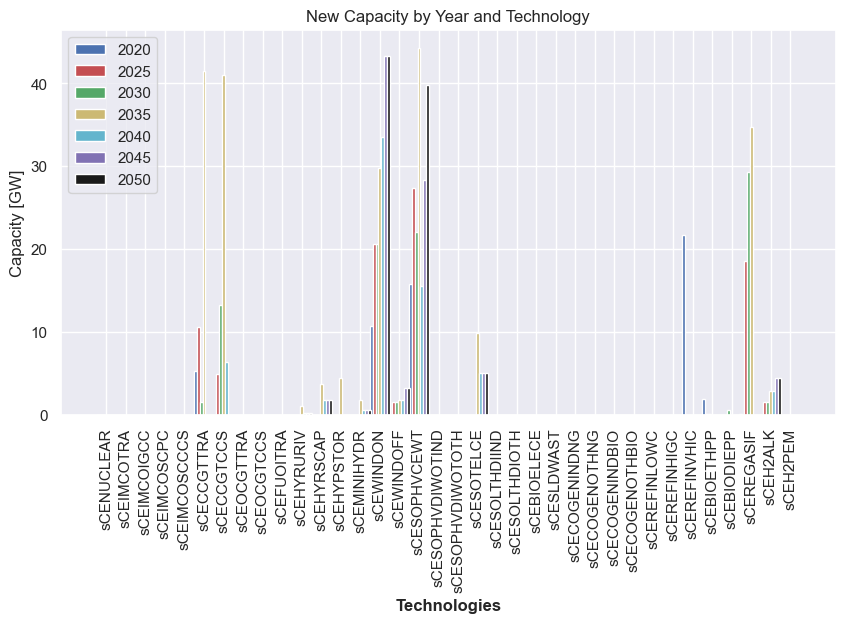

In [73]:
# New capacity installed by technology and year
years = ['y2020', 'y2025', 'y2030', 'y2035', 'y2040', 'y2045', 'y2050']
filtered_data = {}

# Function to filter and process the data
def process_data(year):
    data = data_results['vCENewCap'][data_results['vCENewCap'].sYear == year]
    data = data[~data.sCE.str.startswith(('sPE2TE', 'sTE2TE'))]
    data = data.drop(columns=['sYear']).set_index('sCE')
    return data

# Process data for each year
for year in years:
    filtered_data[year] = process_data(year)

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
positions = [np.arange(len(filtered_data['y2020'])) + i * barWidth for i in range(len(years))]

# Define colors for each year
colors = ['b', 'r', 'g', 'y', 'c', 'm', 'k']

# Make the plot
for i, year in enumerate(years):
    plt.bar(positions[i], filtered_data[year].vCENewCap, color=colors[i], width=barWidth, label=year[1:])

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth * (len(years) - 1) / 2 for r in range(len(filtered_data['y2020']))], filtered_data['y2020'].index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('New Capacity by Year and Technology')
# Create legend & Show graphic
plt.legend()
plt.show()


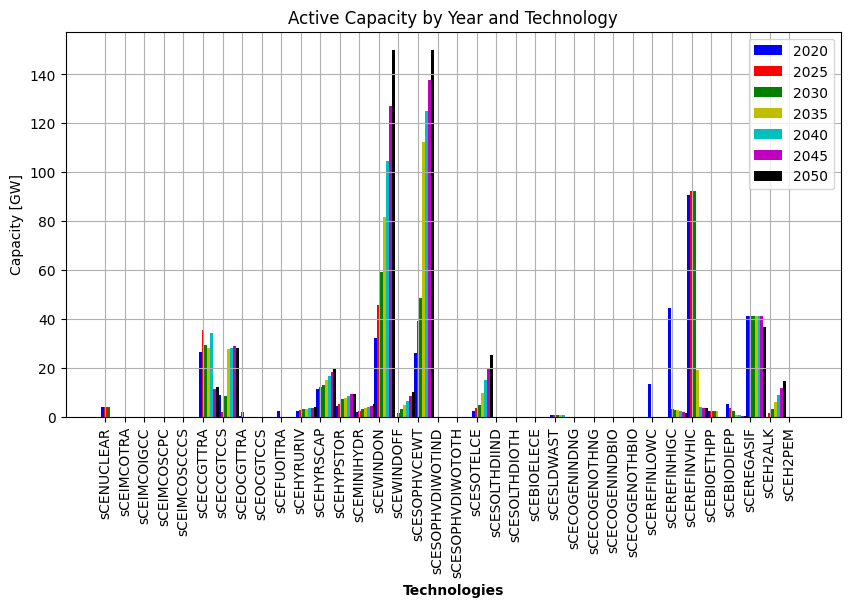

In [24]:
# Active capacity by technology and year
y2020_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2020']
y2025_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2025']
y2030_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2030']
y2035_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2035']
y2040_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2040']
y2045_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2045']
y2050_TotActCap_CE = data_results['vCEActCap'][data_results['vCEActCap'].sYear=='y2050']

# Avoid all the variables in sCE that begin with sPE2TE and sTE2TE
y2020_TotActCap_CE = y2020_TotActCap_CE[~y2020_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2025_TotActCap_CE = y2025_TotActCap_CE[~y2025_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2030_TotActCap_CE = y2030_TotActCap_CE[~y2030_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2035_TotActCap_CE = y2035_TotActCap_CE[~y2035_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2040_TotActCap_CE = y2040_TotActCap_CE[~y2040_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2045_TotActCap_CE = y2045_TotActCap_CE[~y2045_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2050_TotActCap_CE = y2050_TotActCap_CE[~y2050_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2020_TotActCap_CE = y2020_TotActCap_CE[~y2020_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2025_TotActCap_CE = y2025_TotActCap_CE[~y2025_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2030_TotActCap_CE = y2030_TotActCap_CE[~y2030_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2035_TotActCap_CE = y2035_TotActCap_CE[~y2035_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2040_TotActCap_CE = y2040_TotActCap_CE[~y2040_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2045_TotActCap_CE = y2045_TotActCap_CE[~y2045_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2050_TotActCap_CE = y2050_TotActCap_CE[~y2050_TotActCap_CE.sCE.str.startswith('sTE2TE')]

# Delete the column sYear and make the index the column sCE
y2020_TotActCap_CE = y2020_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2025_TotActCap_CE = y2025_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2030_TotActCap_CE = y2030_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2035_TotActCap_CE = y2035_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2040_TotActCap_CE = y2040_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2045_TotActCap_CE = y2045_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2050_TotActCap_CE = y2050_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotActCap_CE))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotActCap_CE.vCEActCap, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotActCap_CE.vCEActCap, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotActCap_CE.vCEActCap, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotActCap_CE.vCEActCap, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotActCap_CE.vCEActCap, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotActCap_CE.vCEActCap, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotActCap_CE.vCEActCap, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotActCap_CE))], y2020_TotActCap_CE.index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Active Capacity by Year and Technology')
plt.grid()
# Create legend & Show graphic
plt.legend()
plt.show()

In [25]:
# Lets define a dataset with the characteristics of each CE technology
# The dataset NAMED CE TECHNOLOGIES will contain the following columns:
# - sCE: Name of the technology
# - sYear: Year of the data
# - vInvCostCE: Investment cost of the technology
# - vCENewCap: New capacity of the technology
# - vCETotCap: Total capacity of the technology
# - vCEDecCap: Decomissioned capacity of the technology
# - vCEActCap: Actual capacity of the technology
# - vCEHibCap: Hibernated capacity of the technology
# - vCEDeltaActCap: Change in actual capacity of the technology
# - vEmiCO2CE: CO2 emissions of the technology
# - vEmiSOxCE: SOx emissions of the technology
# - vEmiPM25CE: PM2.5 emissions of the technology

# Create the dataset
import pandas as pd
CE_TECHNOLOGIES = pd.DataFrame(columns=['sCE', 'sYear', 'vCETotCap', 'vCENewCap', 'vCEDecCap', 'vCEActCap', 'vCEHibCap','vInvCostCE' ,'vCEDeltaActCap', 'vEmiCO2CE', 'vEmiSOxCE', 'vEmiPM25CE'])

# Fill the dataset with the data
CE_TECHNOLOGIES['sCE'] = data_results['vInvCostCE'].sCE
CE_TECHNOLOGIES['sYear'] = data_results['vInvCostCE'].sYear
CE_TECHNOLOGIES['vCETotCap'] = data_results['vCETotCap'].vCETotCap
CE_TECHNOLOGIES['vCENewCap'] = data_results['vCENewCap'].vCENewCap
CE_TECHNOLOGIES['vCEDecCap'] = data_results['vCEDecCap'].vCEDecCap
CE_TECHNOLOGIES['vCEActCap'] = data_results['vCEActCap'].vCEActCap
CE_TECHNOLOGIES['vCEHibCap'] = data_results['vCEHibCap'].vCEHibCap
CE_TECHNOLOGIES['vInvCostCE'] = data_results['vInvCostCE'].vInvCostCE
CE_TECHNOLOGIES['vCEDeltaActCap'] = data_results['vCEDeltaActCap'].vCEDeltaActCap
CE_TECHNOLOGIES['vEmiCO2CE'] = data_results['vEmiCO2CE'].vEmiCO2CE
CE_TECHNOLOGIES['vEmiSOxCE'] = data_results['vEmiSOxCE'].vEmiSOxCE
CE_TECHNOLOGIES['vEmiPM25CE'] = data_results['vEmiPM25CE'].vEmiPM25CE

# Lets extract the data for the technology 'sCENUCLEAR' and visualize the results
CE_TECHNOLOGIES[CE_TECHNOLOGIES['sCE']=='sCESOPHVCEWT']


,sCE,sYear,vCETotCap,vCENewCap,vCEDecCap,vCEActCap,vCEHibCap,vInvCostCE,vCEDeltaActCap,vEmiCO2CE,vEmiSOxCE,vEmiPM25CE
112,sCESOPHVCEWT,y2020,26.175357,13.960157,3.053800,26.175357,0.0,6.604944,0.0,0.0,0.0,0.0
113,sCESOPHVCEWT,y2025,39.099308,15.977751,3.053800,39.099308,0.0,4.899891,0.0,0.0,0.0,0.0
114,sCESOPHVCEWT,y2030,48.706258,12.660750,3.053800,48.706258,0.0,2.535866,0.0,0.0,0.0,0.0
115,sCESOPHVCEWT,y2035,112.500000,66.847542,3.053800,112.500000,0.0,8.535883,0.0,0.0,0.0,0.0
116,sCESOPHVCEWT,y2040,125.000000,15.553800,3.053800,125.000000,0.0,1.310182,0.0,0.0,0.0,0.0
117,sCESOPHVCEWT,y2045,137.500000,26.460157,13.960157,137.500000,0.0,1.495684,0.0,0.0,0.0,0.0
118,sCESOPHVCEWT,y2050,150.000000,28.477751,15.977751,150.000000,0.0,1.049541,0.0,0.0,0.0,0.0


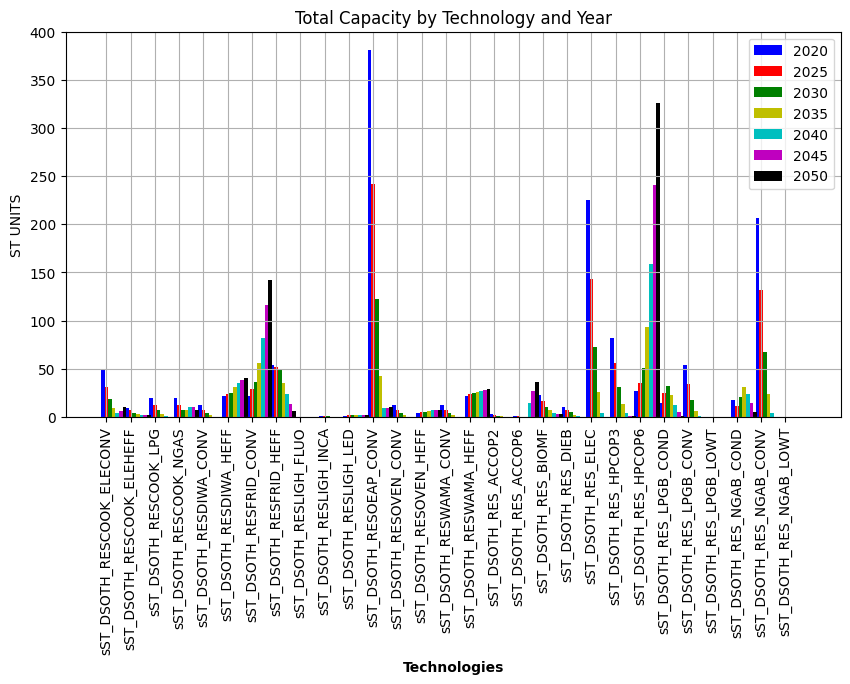

In [19]:
# vTotalCapST
y2020_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2025_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2030_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2035_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2040_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2045_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2050_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap


# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_ST))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_ST, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_ST, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_ST, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_ST, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_ST, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_ST, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_ST, color='k', width=barWidth, label='2050')


# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_ST))], y2020_TotCap_ST.index, rotation=90)
plt.ylabel('ST UNITS')
plt.title('Total Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()

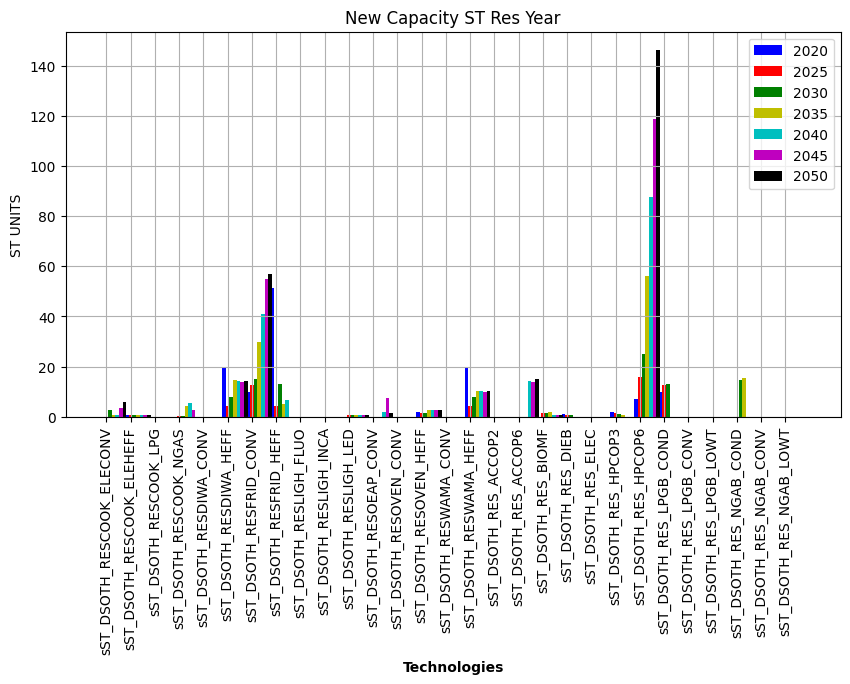

In [23]:
# vTotalCapST
y2020_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2020') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2025_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2025') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2030_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2030') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2035_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2035') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2040_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2040') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2045_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2045') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap
y2050_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2050') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTNewCap


# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_ST))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_ST, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_ST, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_ST, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_ST, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_ST, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_ST, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_ST, color='k', width=barWidth, label='2050')


# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_ST))], y2020_TotCap_ST.index, rotation=90)
plt.ylabel('ST UNITS')
plt.title('New Capacity ST Res Year')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()

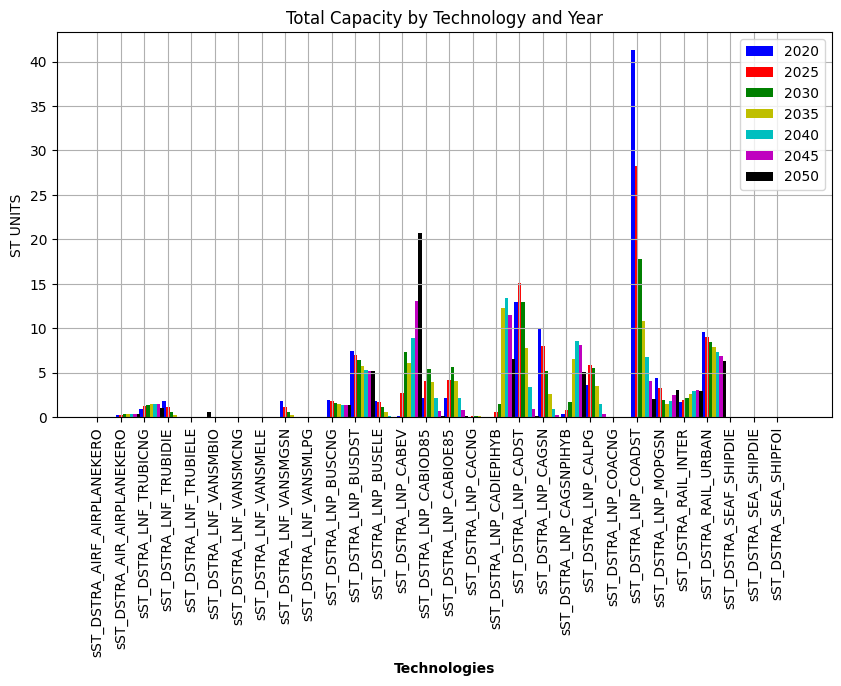

In [42]:
# vTotalCapST
y2020_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2025_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2030_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2035_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2040_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2045_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap
y2050_TotCap_ST = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTTotCap


# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_ST))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_ST, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_ST, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_ST, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_ST, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_ST, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_ST, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_ST, color='k', width=barWidth, label='2050')


# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_ST))], y2020_TotCap_ST.index, rotation=90)
plt.ylabel('ST UNITS')
plt.title('Total Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()

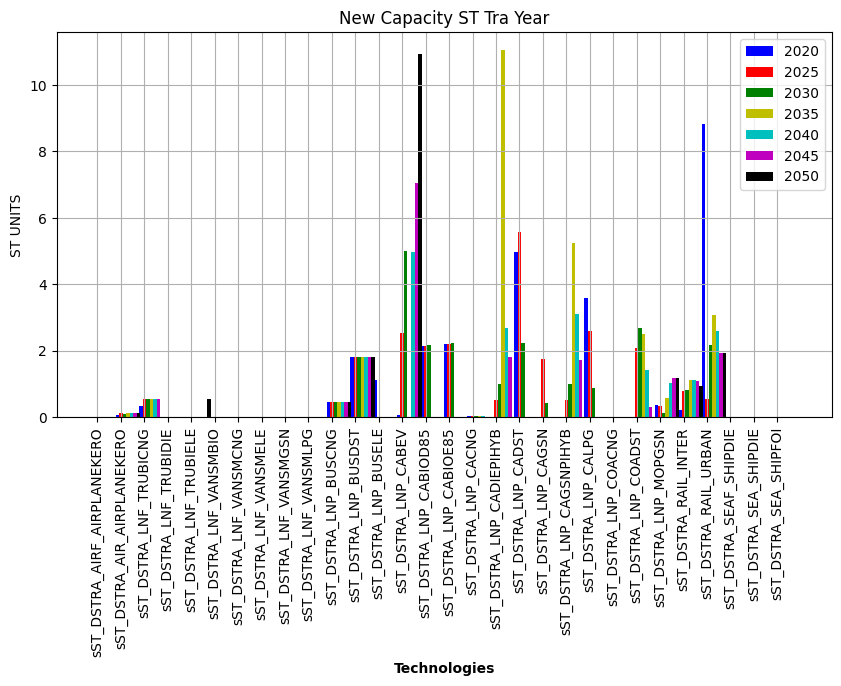

In [41]:
# vTotalCapST
y2020_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2020') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2025_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2025') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2030_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2030') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2035_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2035') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2040_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2040') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2045_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2045') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap
y2050_TotCap_ST = data_results['vSTNewCap'][(data_results['vSTNewCap'].sYear=='y2050') & (data_results['vSTNewCap'].sST.str.startswith('sST_DSTRA'))].groupby('sST').sum().vSTNewCap


# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_ST))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_ST, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_ST, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_ST, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_ST, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_ST, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_ST, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_ST, color='k', width=barWidth, label='2050')


# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_ST))], y2020_TotCap_ST.index, rotation=90)
plt.ylabel('ST UNITS')
plt.title('New Capacity ST Tra Year')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()

In [25]:
# Lets define a dataset with the characteristics of each CE technology
# The dataset NAMED CE TECHNOLOGIES will contain the following columns:
# - sTE: Name of the technology
# - sYear: Year of the data
# - vInvCostST: Investment cost of the technology
# - vSTNewCap: New capacity of the technology
# - vSTTotCap: Total capacity of the technology
# - vSTDecCap: Decomissioned capacity of the technology
# - vEmiCO2ST: CO2 emissions of the technology
# - vEmiSOxST: SOx emissions of the technology
# - vEmiPM25ST: PM2.5 emissions of the technology

# # Create the dataset
# import pandas as pd
ST_TECHNOLOGIES = pd.DataFrame(columns=['sST', 'sYear', 'vSTTotCap', 'vSTNewCap', 'vSTDecCap', 'vInvCostST' , 'vEmiCO2ST', 'vEmiSOxST', 'vEmiPM25ST'])

# # Fill the dataset with the data
#ST_TECHNOLOGIES_sST          = pd.DataFrame(data_results['vSTTotCap'][data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES')].groupby('sST').sum().vSTTotCap).index
#ST_TECHNOLOGIES['sYear']        = data_results['vInvCostST'].sYear
ST_TECHNOLOGIES_vSTTotCap    = pd.DataFrame(data_results['vSTTotCap'][data_results['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vSTTotCap).reset_index()
ST_TECHNOLOGIES_vSTNewCap    = pd.DataFrame(data_results['vSTNewCap'][data_results['vSTNewCap'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vSTNewCap).reset_index()
ST_TECHNOLOGIES_vSTDecCap    = pd.DataFrame(data_results['vSTDecCap'][data_results['vSTDecCap'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vSTDecCap).reset_index()
ST_TECHNOLOGIES_vInvCostST   = pd.DataFrame(data_results['vInvCostST'][data_results['vInvCostST'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vInvCostST).reset_index()
ST_TECHNOLOGIES_vEmiCO2ST    = pd.DataFrame(data_results['vEmiCO2ST'][data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vEmiCO2ST).reset_index()
ST_TECHNOLOGIES_vEmiSOxST    = pd.DataFrame(data_results['vEmiSOxST'][data_results['vEmiSOxST'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vEmiSOxST).reset_index()
ST_TECHNOLOGIES_vEmiPM25ST   = pd.DataFrame(data_results['vEmiPM25ST'][data_results['vEmiPM25ST'].sST.str.startswith('sST_DSOTH_RES')].groupby(['sST','sYear']).sum().vEmiPM25ST).reset_index()

# Join the dataframes to create a single dataframe preserving the columns sST and sYear as keys
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES_vSTTotCap, ST_TECHNOLOGIES_vSTNewCap, on=['sST','sYear'])
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES, ST_TECHNOLOGIES_vSTDecCap, on=['sST','sYear'])
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES, ST_TECHNOLOGIES_vInvCostST, on=['sST','sYear'])
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES, ST_TECHNOLOGIES_vEmiCO2ST, on=['sST','sYear'])
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES, ST_TECHNOLOGIES_vEmiSOxST, on=['sST','sYear'])
ST_TECHNOLOGIES = pd.merge(ST_TECHNOLOGIES, ST_TECHNOLOGIES_vEmiPM25ST, on=['sST','sYear'])

ST_TECHNOLOGIES[ST_TECHNOLOGIES['sST']=='sST_DSOTH_RES_HPCOP6']

,sST,sYear,vSTTotCap,vSTNewCap,vSTDecCap,vInvCostST,vEmiCO2ST,vEmiSOxST,vEmiPM25ST
154,sST_DSOTH_RES_HPCOP6,y2020,26.509100,7.00000,5.796900,15.655850,0.0,0.0,0.0
155,sST_DSOTH_RES_HPCOP6,y2025,34.915570,16.00000,7.593530,17.784614,0.0,0.0,0.0
156,sST_DSOTH_RES_HPCOP6,y2030,50.334343,25.00000,9.581227,13.157990,0.0,0.0,0.0
157,sST_DSOTH_RES_HPCOP6,y2035,93.144983,56.25000,13.439360,18.974072,0.0,0.0,0.0
158,sST_DSOTH_RES_HPCOP6,y2040,159.204800,87.50000,21.440183,19.194314,0.0,0.0,0.0
159,sST_DSOTH_RES_HPCOP6,y2045,240.932200,118.75000,37.022600,17.040628,0.0,0.0,0.0
160,sST_DSOTH_RES_HPCOP6,y2050,325.685385,146.32101,61.567825,13.790909,0.0,0.0,0.0


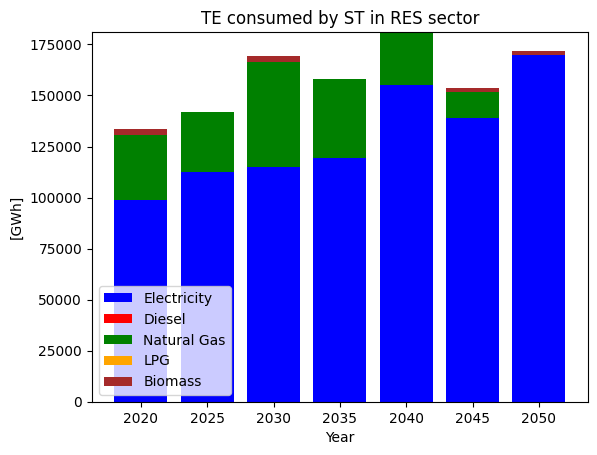

In [10]:
y2020_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEELE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEOPDIE_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTENAGAS_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEOLPG_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEBIOMA_RES = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
sTEELE_RES = [y2020_sTEELE_RES, y2025_sTEELE_RES, y2030_sTEELE_RES, y2035_sTEELE_RES, y2040_sTEELE_RES, y2045_sTEELE_RES, y2050_sTEELE_RES]
sTEOPDIE_RES = [y2020_sTEOPDIE_RES, y2025_sTEOPDIE_RES, y2030_sTEOPDIE_RES, y2035_sTEOPDIE_RES, y2040_sTEOPDIE_RES, y2045_sTEOPDIE_RES, y2050_sTEOPDIE_RES]
sTENAGAS_RES = [y2020_sTENAGAS_RES, y2025_sTENAGAS_RES, y2030_sTENAGAS_RES, y2035_sTENAGAS_RES, y2040_sTENAGAS_RES, y2045_sTENAGAS_RES, y2050_sTENAGAS_RES]
sTEOLPG_RES = [y2020_sTEOLPG_RES, y2025_sTEOLPG_RES, y2030_sTEOLPG_RES, y2035_sTEOLPG_RES, y2040_sTEOLPG_RES, y2045_sTEOLPG_RES, y2050_sTEOLPG_RES]
sTEBIOMA_RES = [y2020_sTEBIOMA_RES, y2025_sTEBIOMA_RES, y2030_sTEBIOMA_RES, y2035_sTEBIOMA_RES, y2040_sTEBIOMA_RES, y2045_sTEBIOMA_RES, y2050_sTEBIOMA_RES]

plt.bar(years, sTEELE_RES, label='Electricity', color='blue')
plt.bar(years, sTEOPDIE_RES, label='Diesel', color='red', bottom=sTEELE_RES)
plt.bar(years, sTENAGAS_RES, label='Natural Gas', color='green', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES)])
plt.bar(years, sTEOLPG_RES, label='LPG', color='orange', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES, sTENAGAS_RES)])
plt.bar(years, sTEBIOMA_RES, label='Biomass', color='brown', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES, sTENAGAS_RES, sTEOLPG_RES)])
plt.title('TE consumed by ST in RES sector')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend()
plt.show()

C:\Users\marios\AppData\Local\Temp\ipykernel_28048\3538486197.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2025gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT']

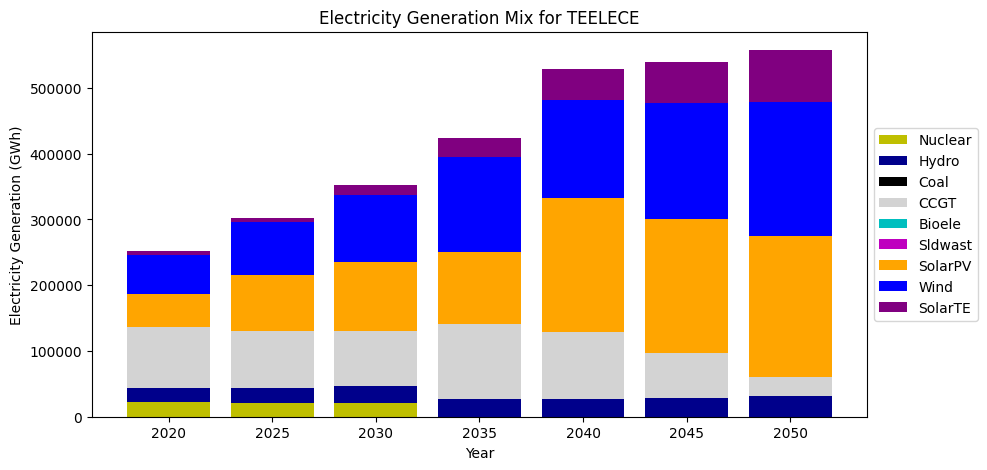

In [12]:
y2020_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_Nuclear_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_solarPV_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050solarTELC_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_wind_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()
y2025hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()
y2030hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum()
y2035hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum()
y2040hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum()
y2045hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum()
y2050hydro_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()+ data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum()

y2020coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050coalCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()
y2025gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCESecOUT.sum()
y2030gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCESecOUT.sum()
y2035gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCESecOUT.sum()
y2040gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCESecOUT.sum()
y2045gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCESecOUT.sum()
y2050gasCE_TEELECE = data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum()  + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum() + data_results['vQCESecOUT'][(data_results['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (data_results['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCESecOUT.sum()


y2020bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050bioeleCE_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050sldwast_TEELECE = data_results['vQCEPriOUT'][(data_results['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (data_results['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (data_results['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()


# Graph
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
Nuclear_TEELECE = [y2020_Nuclear_TEELECE, y2025_Nuclear_TEELECE, y2030_Nuclear_TEELECE, y2035_Nuclear_TEELECE, y2040_Nuclear_TEELECE, y2045_Nuclear_TEELECE, y2050_Nuclear_TEELECE]
Hydro_TEELECE = [y2020hydro_TEELECE, y2025hydro_TEELECE, y2030hydro_TEELECE, y2035hydro_TEELECE, y2040hydro_TEELECE, y2045hydro_TEELECE, y2050hydro_TEELECE]
Coal_TEELECE = [y2020coalCE_TEELECE, y2025coalCE_TEELECE, y2030coalCE_TEELECE, y2035coalCE_TEELECE, y2040coalCE_TEELECE, y2045coalCE_TEELECE, y2050coalCE_TEELECE]
Gas_TEELECE = [y2020gasCE_TEELECE, y2025gasCE_TEELECE, y2030gasCE_TEELECE, y2035gasCE_TEELECE, y2040gasCE_TEELECE, y2045gasCE_TEELECE, y2050gasCE_TEELECE]
Bioele_TEELECE = [y2020bioeleCE_TEELECE, y2025bioeleCE_TEELECE, y2030bioeleCE_TEELECE, y2035bioeleCE_TEELECE, y2040bioeleCE_TEELECE, y2045bioeleCE_TEELECE, y2050bioeleCE_TEELECE]
Sldwast_TEELECE = [y2020sldwast_TEELECE, y2025sldwast_TEELECE, y2030sldwast_TEELECE, y2035sldwast_TEELECE, y2040sldwast_TEELECE, y2045sldwast_TEELECE, y2050sldwast_TEELECE]
SolarPV_TEELECE = [y2020_solarPV_TEELECE, y2025_solarPV_TEELECE, y2030_solarPV_TEELECE, y2035_solarPV_TEELECE, y2040_solarPV_TEELECE, y2045_solarPV_TEELECE, y2050_solarPV_TEELECE]
Wind_TEELECE = [y2020_wind_TEELECE, y2025_wind_TEELECE, y2030_wind_TEELECE, y2035_wind_TEELECE, y2040_wind_TEELECE, y2045_wind_TEELECE, y2050_wind_TEELECE]
SolarTE_TEELECE = [y2020solarTELC_TEELECE, y2025solarTELC_TEELECE, y2030solarTELC_TEELECE, y2035solarTELC_TEELECE, y2040solarTELC_TEELECE, y2045solarTELC_TEELECE, y2050solarTELC_TEELECE]

# Use the same data to make a stacked bar chart
plt.figure(figsize=(10, 5))
plt.bar(years, Nuclear_TEELECE, color='y', label='Nuclear')
plt.bar(years, Hydro_TEELECE, bottom=Nuclear_TEELECE, color='darkblue', label='Hydro')
plt.bar(years, Coal_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE)], color='k', label='Coal')
plt.bar(years, Gas_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE)], color='lightgrey', label='CCGT')
plt.bar(years, Bioele_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE)], color='c', label='Bioele')
plt.bar(years, Sldwast_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE)], color='m', label='Sldwast')
plt.bar(years, SolarPV_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE, Sldwast_TEELECE)], color='orange', label='SolarPV')
plt.bar(years, Wind_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE, Sldwast_TEELECE, SolarPV_TEELECE)], color='blue', label='Wind')
plt.bar(years, SolarTE_TEELECE, bottom=[sum(x) for x in zip(Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE, Sldwast_TEELECE, SolarPV_TEELECE, Wind_TEELECE)], color='purple', label='SolarTE')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Electricity Generation Mix for TEELECE')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.show()

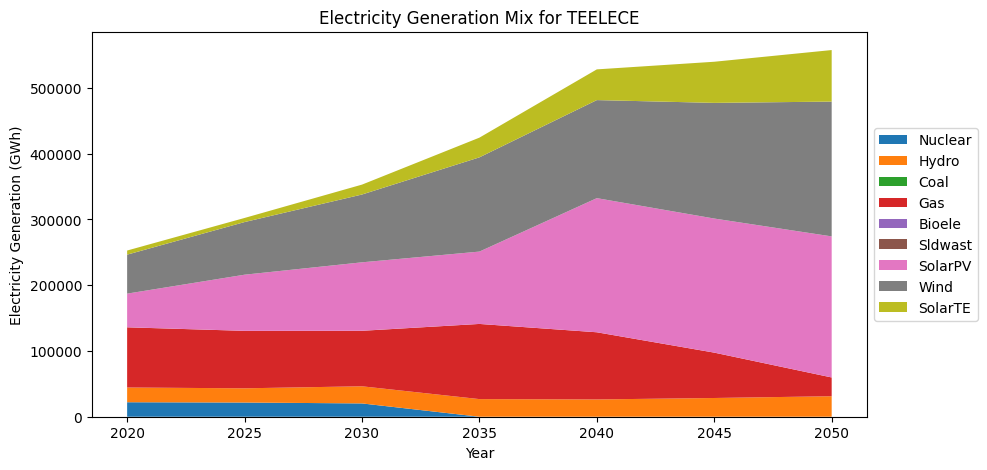

In [13]:
# Make an area chart with the data considering each as a portion of the whole
plt.figure(figsize=(10, 5))
plt.stackplot(years, Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE, Sldwast_TEELECE, SolarPV_TEELECE, Wind_TEELECE, SolarTE_TEELECE, labels=['Nuclear', 'Hydro', 'Coal', 'Gas', 'Bioele', 'Sldwast', 'SolarPV', 'Wind', 'SolarTE'])
plt.legend(loc='upper left')
# put the leged out of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Electricity Generation Mix for TEELECE')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.show()


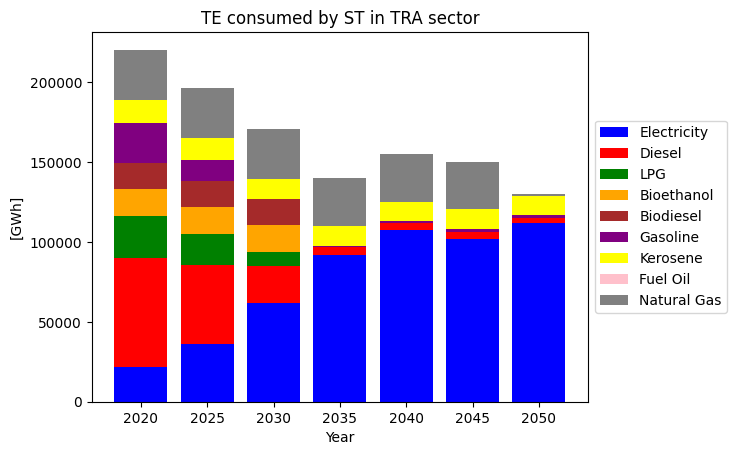

In [12]:
y2020_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEELE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPDIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOLPG_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEBIOETH_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEBIODIE_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPGSN_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPKER_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPFOI_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTENAGAS_TRA = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()


# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
sTEELE_TRA = [y2020_sTEELE_TRA, y2025_sTEELE_TRA, y2030_sTEELE_TRA, y2035_sTEELE_TRA, y2040_sTEELE_TRA, y2045_sTEELE_TRA, y2050_sTEELE_TRA]
sTEOPDIE_TRA = [y2020_sTEOPDIE_TRA, y2025_sTEOPDIE_TRA, y2030_sTEOPDIE_TRA, y2035_sTEOPDIE_TRA, y2040_sTEOPDIE_TRA, y2045_sTEOPDIE_TRA, y2050_sTEOPDIE_TRA]
sTEOLPG_TRA = [y2020_sTEOLPG_TRA, y2025_sTEOLPG_TRA, y2030_sTEOLPG_TRA, y2035_sTEOLPG_TRA, y2040_sTEOLPG_TRA, y2045_sTEOLPG_TRA, y2050_sTEOLPG_TRA]
sTEBIOETH_TRA = [y2020_sTEBIOETH_TRA, y2025_sTEBIOETH_TRA, y2030_sTEBIOETH_TRA, y2035_sTEBIOETH_TRA, y2040_sTEBIOETH_TRA, y2045_sTEBIOETH_TRA, y2050_sTEBIOETH_TRA]
sTEBIODIE_TRA = [y2020_sTEBIODIE_TRA, y2025_sTEBIODIE_TRA, y2030_sTEBIODIE_TRA, y2035_sTEBIODIE_TRA, y2040_sTEBIODIE_TRA, y2045_sTEBIODIE_TRA, y2050_sTEBIODIE_TRA]
sTEOPGSN_TRA = [y2020_sTEOPGSN_TRA, y2025_sTEOPGSN_TRA, y2030_sTEOPGSN_TRA, y2035_sTEOPGSN_TRA, y2040_sTEOPGSN_TRA, y2045_sTEOPGSN_TRA, y2050_sTEOPGSN_TRA]
sTEOPKER_TRA = [y2020_sTEOPKER_TRA, y2025_sTEOPKER_TRA, y2030_sTEOPKER_TRA, y2035_sTEOPKER_TRA, y2040_sTEOPKER_TRA, y2045_sTEOPKER_TRA, y2050_sTEOPKER_TRA]
sTEOPFOI_TRA = [y2020_sTEOPFOI_TRA, y2025_sTEOPFOI_TRA, y2030_sTEOPFOI_TRA, y2035_sTEOPFOI_TRA, y2040_sTEOPFOI_TRA, y2045_sTEOPFOI_TRA, y2050_sTEOPFOI_TRA]
sTENAGAS_TRA = [y2020_sTENAGAS_TRA, y2025_sTENAGAS_TRA, y2030_sTENAGAS_TRA, y2035_sTENAGAS_TRA, y2040_sTENAGAS_TRA, y2045_sTENAGAS_TRA, y2050_sTENAGAS_TRA]


plt.bar(years, sTEELE_TRA, label='Electricity', color='blue')
plt.bar(years, sTEOPDIE_TRA, label='Diesel', color='red', bottom=sTEELE_TRA)
plt.bar(years, sTEOLPG_TRA, label='LPG', color='green', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA)])
plt.bar(years, sTEBIOETH_TRA, label='Bioethanol', color='orange', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA)])
plt.bar(years, sTEBIODIE_TRA, label='Biodiesel', color='brown', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA)])
plt.bar(years, sTEOPGSN_TRA, label='Gasoline', color='purple', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA)])
plt.bar(years, sTEOPKER_TRA, label='Kerosene', color='yellow', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA)])
plt.bar(years, sTEOPFOI_TRA, label='Fuel Oil', color='pink', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA, sTEOPKER_TRA)])
plt.bar(years, sTENAGAS_TRA, label='Natural Gas', color='grey', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA, sTEOPKER_TRA, sTEOPFOI_TRA)])

plt.title('TE consumed by ST in TRA sector')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

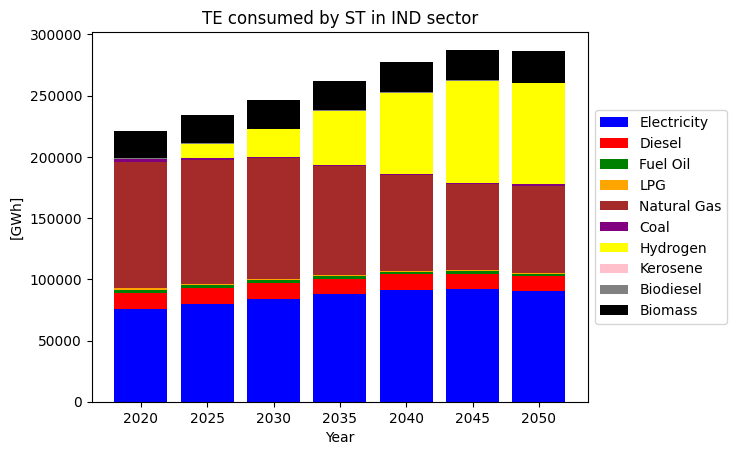

In [14]:
y2020_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEELE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEELEIND')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEOPDIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEOPFOI_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEOPLPG_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTENAGAS_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTECOAL_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTECOAL')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEH2_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEH2')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEOPKER_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEBIODIE_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

y2020_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2020') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2025_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2025') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2030_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2030') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2035_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2035') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2040_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2040') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2045_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2045') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
y2050_sTEBIOMA_IND = data_results['vQSTInTE'][(data_results['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (data_results['vQSTInTE'].sYear=='y2050') & (data_results['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
sTEELE_IND = [y2020_sTEELE_IND, y2025_sTEELE_IND, y2030_sTEELE_IND, y2035_sTEELE_IND, y2040_sTEELE_IND, y2045_sTEELE_IND, y2050_sTEELE_IND]
sTEOPDIE_IND = [y2020_sTEOPDIE_IND, y2025_sTEOPDIE_IND, y2030_sTEOPDIE_IND, y2035_sTEOPDIE_IND, y2040_sTEOPDIE_IND, y2045_sTEOPDIE_IND, y2050_sTEOPDIE_IND]
sTEOPFOI_IND = [y2020_sTEOPFOI_IND, y2025_sTEOPFOI_IND, y2030_sTEOPFOI_IND, y2035_sTEOPFOI_IND, y2040_sTEOPFOI_IND, y2045_sTEOPFOI_IND, y2050_sTEOPFOI_IND]
sTEOPLPG_IND = [y2020_sTEOPLPG_IND, y2025_sTEOPLPG_IND, y2030_sTEOPLPG_IND, y2035_sTEOPLPG_IND, y2040_sTEOPLPG_IND, y2045_sTEOPLPG_IND, y2050_sTEOPLPG_IND]
sTENAGAS_IND = [y2020_sTENAGAS_IND, y2025_sTENAGAS_IND, y2030_sTENAGAS_IND, y2035_sTENAGAS_IND, y2040_sTENAGAS_IND, y2045_sTENAGAS_IND, y2050_sTENAGAS_IND]
sTECOAL_IND = [y2020_sTECOAL_IND, y2025_sTECOAL_IND, y2030_sTECOAL_IND, y2035_sTECOAL_IND, y2040_sTECOAL_IND, y2045_sTECOAL_IND, y2050_sTECOAL_IND]
sTEH2_IND = [y2020_sTEH2_IND, y2025_sTEH2_IND, y2030_sTEH2_IND, y2035_sTEH2_IND, y2040_sTEH2_IND, y2045_sTEH2_IND, y2050_sTEH2_IND]
sTEOPKER_IND = [y2020_sTEOPKER_IND, y2025_sTEOPKER_IND, y2030_sTEOPKER_IND, y2035_sTEOPKER_IND, y2040_sTEOPKER_IND, y2045_sTEOPKER_IND, y2050_sTEOPKER_IND]
sTEBIODIE_IND = [y2020_sTEBIODIE_IND, y2025_sTEBIODIE_IND, y2030_sTEBIODIE_IND, y2035_sTEBIODIE_IND, y2040_sTEBIODIE_IND, y2045_sTEBIODIE_IND, y2050_sTEBIODIE_IND]
sTEBIOMA_IND = [y2020_sTEBIOMA_IND, y2025_sTEBIOMA_IND, y2030_sTEBIOMA_IND, y2035_sTEBIOMA_IND, y2040_sTEBIOMA_IND, y2045_sTEBIOMA_IND, y2050_sTEBIOMA_IND]

plt.bar(years, sTEELE_IND, label='Electricity', color='blue')
plt.bar(years, sTEOPDIE_IND, label='Diesel', color='red', bottom=sTEELE_IND)
plt.bar(years, sTEOPFOI_IND, label='Fuel Oil', color='green', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND)])
plt.bar(years, sTEOPLPG_IND, label='LPG', color='orange', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND)])
plt.bar(years, sTENAGAS_IND, label='Natural Gas', color='brown', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND)])
plt.bar(years, sTECOAL_IND, label='Coal', color='purple', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND, sTENAGAS_IND)])
plt.bar(years, sTEH2_IND, label='Hydrogen', color='yellow', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND, sTENAGAS_IND, sTECOAL_IND)])
plt.bar(years, sTEOPKER_IND, label='Kerosene', color='pink', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND, sTENAGAS_IND, sTECOAL_IND, sTEH2_IND)])
plt.bar(years, sTEBIODIE_IND, label='Biodiesel', color='grey', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND, sTENAGAS_IND, sTECOAL_IND, sTEH2_IND, sTEOPKER_IND)])
plt.bar(years, sTEBIOMA_IND, label='Biomass', color='black', bottom=[sum(x) for x in zip(sTEELE_IND, sTEOPDIE_IND, sTEOPFOI_IND, sTEOPLPG_IND, sTENAGAS_IND, sTECOAL_IND, sTEH2_IND, sTEOPKER_IND, sTEBIODIE_IND)])

plt.title('TE consumed by ST in IND sector')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


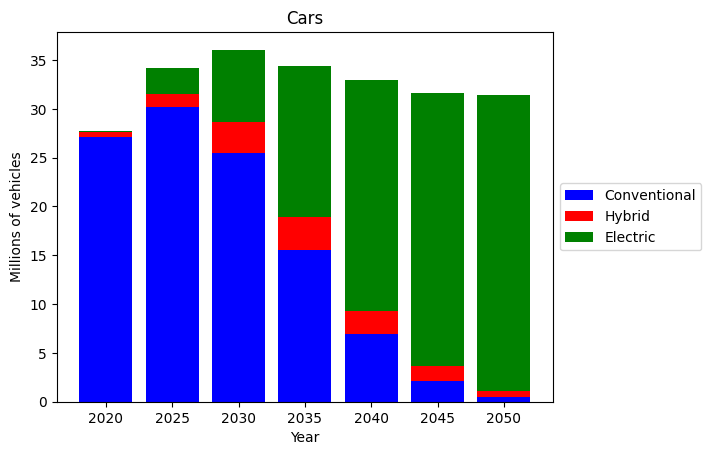

In [5]:
CarGasoline_2020        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2020          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2020             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2020             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2020     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2020       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2020        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2020') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2025        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2025          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2025             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2025             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2025     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2025       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2025        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2025') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2030        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2030          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2030             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2030             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2030     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2030       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2030        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2030') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2035        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2035          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2035             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2035             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2035     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2035       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2035        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2035') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2040        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2040          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2040             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2040             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2040     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2040       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2040        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2040') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2045        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2045          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2045             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2045             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2045     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2045       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2045        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2045') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2050        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2050          = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2050             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2050             = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2050     = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2050       = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2050        = data_results['vSTTotCap'][(data_results['vSTTotCap'].sYear=='y2050') & (data_results['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
Car_Conventional = [CarGasoline_2020 + CarDiesel_2020 + CarCNG_2020 + CarLPG_2020, CarGasoline_2025 + CarDiesel_2025 + CarCNG_2025 + CarLPG_2025, CarGasoline_2030 + CarDiesel_2030 + CarCNG_2030 + CarLPG_2030, CarGasoline_2035 + CarDiesel_2035 + CarCNG_2035 + CarLPG_2035, CarGasoline_2040 + CarDiesel_2040 + CarCNG_2040 + CarLPG_2040, CarGasoline_2045 + CarDiesel_2045 + CarCNG_2045 + CarLPG_2045, CarGasoline_2050 + CarDiesel_2050 + CarCNG_2050 + CarLPG_2050]
Car_Hybrid = [CarGasolineHyb_2020 + CarDieselHyb_2020, CarGasolineHyb_2025 + CarDieselHyb_2025, CarGasolineHyb_2030 + CarDieselHyb_2030, CarGasolineHyb_2035 + CarDieselHyb_2035, CarGasolineHyb_2040 + CarDieselHyb_2040, CarGasolineHyb_2045 + CarDieselHyb_2045, CarGasolineHyb_2050 + CarDieselHyb_2050]
Car_Electric = [CarElectric_2020, CarElectric_2025, CarElectric_2030, CarElectric_2035, CarElectric_2040, CarElectric_2045, CarElectric_2050]

plt.bar(years, Car_Conventional, label='Conventional', color='blue')
plt.bar(years, Car_Hybrid, label='Hybrid', color='red', bottom=Car_Conventional)
plt.bar(years, Car_Electric, label='Electric', color='green', bottom=[sum(x) for x in zip(Car_Conventional, Car_Hybrid)])
plt.title('Cars')
plt.xlabel('Year')
plt.ylabel('Millions of vehicles')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))



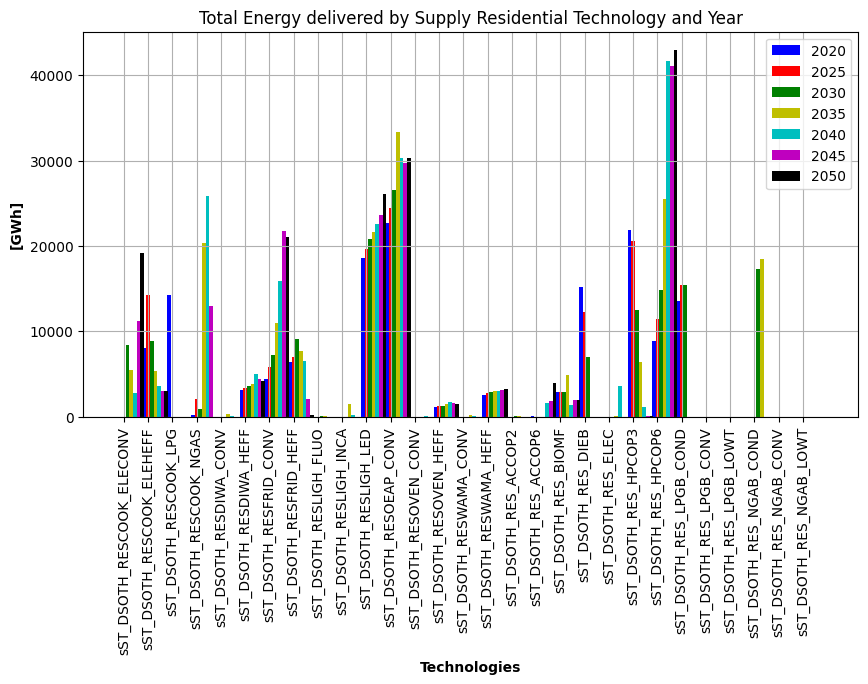

In [22]:
# The following is a df that contains the efficiency (pSTeffTE) of each ST for supplying sES according to the age of the sST (sVin) 

efficiencyST = data_input['pSTEffTE'][data_input['pSTEffTE'].sST.str.startswith('sST_DSOTH_RES')].drop('sTE', axis=1)

# The following is a df that contains the total sES Supplied (vQSTOut) by each sST according to the age of the sST (sVin) in a specific year (sYear) and season (sSeason) day (sDay) and hour (sHour)
TotalSTOut_2020 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2020')]
TotalSTOut_2025 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2025')]
TotalSTOut_2030 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2030')]
TotalSTOut_2035 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2035')]
TotalSTOut_2040 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2040')]
TotalSTOut_2045 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2045')]
TotalSTOut_2050 = data_results['vQSTOut'][(data_results['vQSTOut'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vQSTOut'].sYear=='y2050')]

# Merge the two df on the columns sST, sES and sVin
TotalSTOut_2020 = pd.merge(TotalSTOut_2020, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2025 = pd.merge(TotalSTOut_2025, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2030 = pd.merge(TotalSTOut_2030, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2035 = pd.merge(TotalSTOut_2035, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2040 = pd.merge(TotalSTOut_2040, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2045 = pd.merge(TotalSTOut_2045, efficiencyST, on=['sST', 'sES', 'sVin'])
TotalSTOut_2050 = pd.merge(TotalSTOut_2050, efficiencyST, on=['sST', 'sES', 'sVin'])


#multiply the vQSTOut by the pSTeffTE to get the total energy supplied by each ST
TotalSTOut_2020['TotalEnergySupplied'] = TotalSTOut_2020['vQSTOut']*TotalSTOut_2020['pSTEffTE']
TotalSTOut_2025['TotalEnergySupplied'] = TotalSTOut_2025['vQSTOut']*TotalSTOut_2025['pSTEffTE']
TotalSTOut_2030['TotalEnergySupplied'] = TotalSTOut_2030['vQSTOut']*TotalSTOut_2030['pSTEffTE']
TotalSTOut_2035['TotalEnergySupplied'] = TotalSTOut_2035['vQSTOut']*TotalSTOut_2035['pSTEffTE']
TotalSTOut_2040['TotalEnergySupplied'] = TotalSTOut_2040['vQSTOut']*TotalSTOut_2040['pSTEffTE']
TotalSTOut_2045['TotalEnergySupplied'] = TotalSTOut_2045['vQSTOut']*TotalSTOut_2045['pSTEffTE']
TotalSTOut_2050['TotalEnergySupplied'] = TotalSTOut_2050['vQSTOut']*TotalSTOut_2050['pSTEffTE']

TotalSTOut_2020 = TotalSTOut_2020.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2025 = TotalSTOut_2025.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2030 = TotalSTOut_2030.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2035 = TotalSTOut_2035.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2040 = TotalSTOut_2040.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2045 = TotalSTOut_2045.groupby('sST')['TotalEnergySupplied'].sum()
TotalSTOut_2050 = TotalSTOut_2050.groupby('sST')['TotalEnergySupplied'].sum()


# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(TotalSTOut_2020))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, TotalSTOut_2020, color='b', width=barWidth, label='2020')
plt.bar(r2, TotalSTOut_2025, color='r', width=barWidth, label='2025')
plt.bar(r3, TotalSTOut_2030, color='g', width=barWidth, label='2030')
plt.bar(r4, TotalSTOut_2035, color='y', width=barWidth, label='2035')
plt.bar(r5, TotalSTOut_2040, color='c', width=barWidth, label='2040')
plt.bar(r6, TotalSTOut_2045, color='m', width=barWidth, label='2045')
plt.bar(r7, TotalSTOut_2050, color='k', width=barWidth, label='2050')


# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(TotalSTOut_2020))], TotalSTOut_2020.index, rotation=90)
plt.ylabel('[GWh]', fontweight='bold')
plt.title('Total Energy delivered by Supply Residential Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.grid()
plt.show()


In [6]:
# SEE THE VALUES OF data_results['vSTCapExc'] DIFFERENT FROM ZERO

data_results['vSTCapExc'][data_results['vSTCapExc'].vSTCapExc!=0]

,sST,sYear,vSTCapExc
98,sST_DSTRA_LNP_BUSELE,y2020,1.117219
126,sST_DSTRA_RAIL_URBAN,y2020,8.535912
127,sST_DSTRA_RAIL_URBAN,y2025,0.246661
128,sST_DSTRA_RAIL_URBAN,y2030,1.857882
129,sST_DSTRA_RAIL_URBAN,y2035,2.745627
130,sST_DSTRA_RAIL_URBAN,y2040,2.266191
131,sST_DSTRA_RAIL_URBAN,y2045,1.593680
132,sST_DSTRA_RAIL_URBAN,y2050,1.601019
202,sST_DSTRA_LNF_TRUBIELE,y2050,0.530193
324,sST_DSOTH_RESFRID_CONV,y2030,4.456850


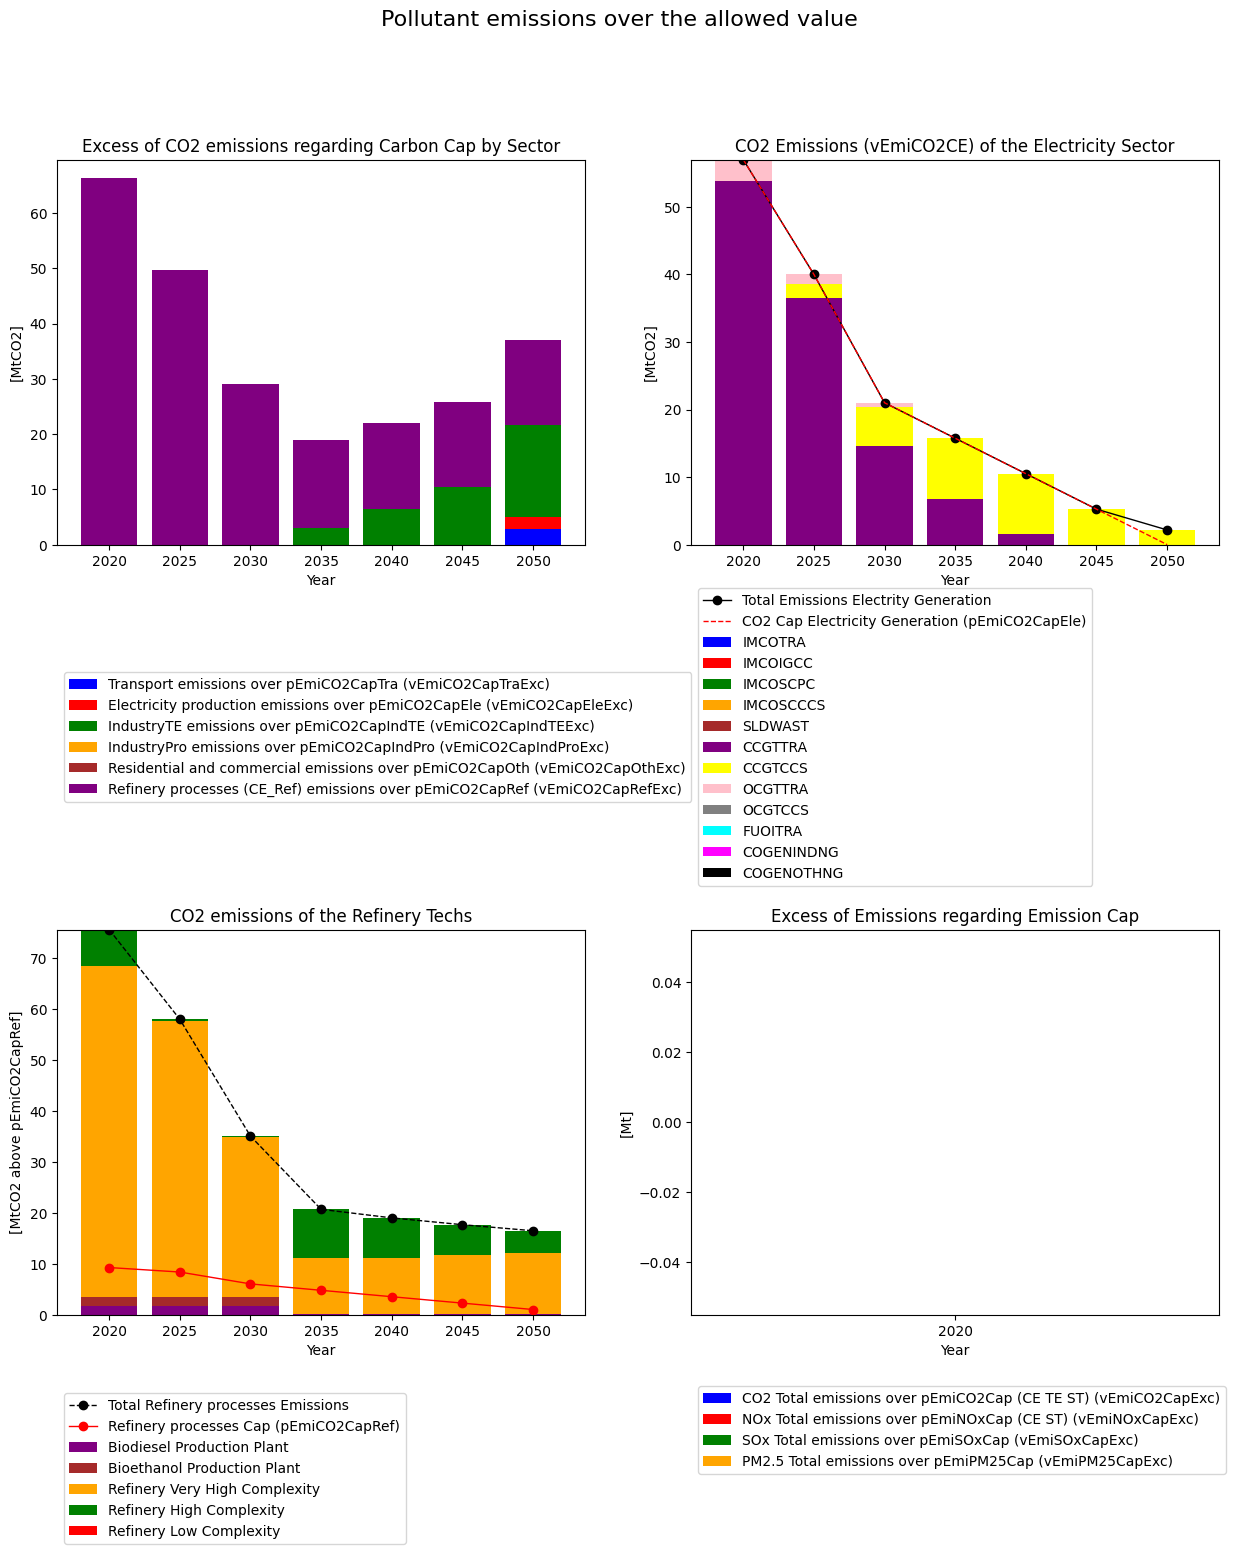

In [7]:
vEmiCO2CapTraExc = data_results['vEmiCO2CapTraExc'].vEmiCO2CapTraExc
vEmiCO2CapEleExc = data_results['vEmiCO2CapEleExc'].vEmiCO2CapEleExc
vEmiCO2CapIndTEExc = data_results['vEmiCO2CapIndTEExc'].vEmiCO2CapIndTEExc
vEmiCO2CapIndProExc = data_results['vEmiCO2CapIndProExc'].vEmiCO2CapIndProExc
vEmiCO2CapOthExc = data_results['vEmiCO2CapOthExc'].vEmiCO2CapOthExc
vEmiCO2CapRefExc = data_results['vEmiCO2CapRefExc'].vEmiCO2CapRefExc

vEmiCO2CapExc = data_results['vEmiCO2CapExc'].vEmiCO2CapExc
vEmiNOxCapExc = data_results['vEmiNOxCapExc'].vEmiNOxCapExc
vEmiSOxCapExc = data_results['vEmiSOxCapExc'].vEmiSOxCapExc
vEmiPM25CapExc = data_results['vEmiPM25CapExc'].vEmiPM25CapExc


fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Pollutant emissions over the allowed value', fontsize=16)
# Separate the graphs of the first column from the second column
plt.subplots_adjust(hspace=1)



# Make a bar plot in the first subplot
axs[0, 0].bar(years, vEmiCO2CapTraExc, label='Transport emissions over pEmiCO2CapTra (vEmiCO2CapTraExc)', color='blue')
axs[0, 0].bar(years, vEmiCO2CapEleExc, label='Electricity production emissions over pEmiCO2CapEle (vEmiCO2CapEleExc)', color='red', bottom=vEmiCO2CapTraExc)
axs[0, 0].bar(years, vEmiCO2CapIndTEExc, label='IndustryTE emissions over pEmiCO2CapIndTE (vEmiCO2CapIndTEExc)', color='green', bottom=[sum(x) for x in zip(vEmiCO2CapTraExc, vEmiCO2CapEleExc)])
axs[0, 0].bar(years, vEmiCO2CapIndProExc, label='IndustryPro emissions over pEmiCO2CapIndPro (vEmiCO2CapIndProExc)', color='orange', bottom=[sum(x) for x in zip(vEmiCO2CapTraExc, vEmiCO2CapEleExc, vEmiCO2CapIndTEExc)])
axs[0, 0].bar(years, vEmiCO2CapOthExc, label='Residential and commercial emissions over pEmiCO2CapOth (vEmiCO2CapOthExc)', color='brown', bottom=[sum(x) for x in zip(vEmiCO2CapTraExc, vEmiCO2CapEleExc, vEmiCO2CapIndTEExc, vEmiCO2CapIndProExc)])
axs[0, 0].bar(years, vEmiCO2CapRefExc, label='Refinery processes (CE_Ref) emissions over pEmiCO2CapRef (vEmiCO2CapRefExc)', color='purple', bottom=[sum(x) for x in zip(vEmiCO2CapTraExc, vEmiCO2CapEleExc, vEmiCO2CapIndTEExc, vEmiCO2CapIndProExc, vEmiCO2CapOthExc)])

#Add a title and labels for the first subplot
axs[0, 0].set_title('Excess of CO2 emissions regarding Carbon Cap by Sector')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('[MtCO2]')
axs[0, 0].legend()
axs[0, 0].legend(loc='center left', bbox_to_anchor=(0, -0.5))



# Make a bar plot in the second subplot
CE_Ele_Emissions_2020 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2020') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2025 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2025') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2030 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2030') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2035 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2035') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2040 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2040') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2045 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2045') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3
CE_Ele_Emissions_2050 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2050') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].vEmiCO2CE.sum()*1e-3

#Graph the emissions of the electricity sector
emissions = [CE_Ele_Emissions_2020, CE_Ele_Emissions_2025, CE_Ele_Emissions_2030, CE_Ele_Emissions_2035, CE_Ele_Emissions_2040, CE_Ele_Emissions_2045, CE_Ele_Emissions_2050]
technologies = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele))].groupby(['sCE','sYear']).vEmiCO2CE.sum()*1e-3

# Preserve only the elements in technologies different from 0
#technologies = technologies[technologies != 0]

axs[0, 1].plot(years, emissions, label='Total Emissions Electrity Generation', color='black', linewidth=1, marker='o')
axs[0, 1].plot(years,data_input['pEmiCO2CapEle'].pEmiCO2CapEle, label='CO2 Cap Electricity Generation (pEmiCO2CapEle)', color='red', linewidth=1, linestyle='dashed')
# CE TECHS with emissions of co2
# sCEIMCOTRA
# sCEIMCOIGCC
# sCEIMCOSCPC
# sCEIMCOSCCCS
# sCESLDWAST
# sCECCGTTRA
# sCECCGTCCS
# sCEOCGTTRA
# sCEOCGTCCS
# sCEFUOITRA
# sCECOGENINDNG
# sCECOGENOTHNG

# Detect the technologies that are in the df that are different from 0
#technologies = technologies.unstack().fillna(0)

# Plot the technologies
axs[0, 1].bar(years, technologies['sCEIMCOTRA'], label='IMCOTRA', color='blue')
axs[0, 1].bar(years, technologies['sCEIMCOIGCC'], label='IMCOIGCC', color='red', bottom=technologies['sCEIMCOTRA'])
axs[0, 1].bar(years, technologies['sCEIMCOSCPC'], label='IMCOSCPC', color='green', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'])])
axs[0, 1].bar(years, technologies['sCEIMCOSCCCS'], label='IMCOSCCCS', color='orange', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'])])
axs[0, 1].bar(years, technologies['sCESLDWAST'], label='SLDWAST', color='brown', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'])])
axs[0, 1].bar(years, technologies['sCECCGTTRA'], label='CCGTTRA', color='purple', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'])])
axs[0, 1].bar(years, technologies['sCECCGTCCS'], label='CCGTCCS', color='yellow', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'])])
axs[0, 1].bar(years, technologies['sCEOCGTTRA'], label='OCGTTRA', color='pink', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'], technologies['sCECCGTCCS'])])
axs[0, 1].bar(years, technologies['sCEOCGTCCS'], label='OCGTCCS', color='grey', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'], technologies['sCECCGTCCS'], technologies['sCEOCGTTRA'])])
axs[0, 1].bar(years, technologies['sCEFUOITRA'], label='FUOITRA', color='cyan', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'], technologies['sCECCGTCCS'], technologies['sCEOCGTTRA'], technologies['sCEOCGTCCS'])])
axs[0, 1].bar(years, technologies['sCECOGENINDNG'], label='COGENINDNG', color='magenta', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'], technologies['sCECCGTCCS'], technologies['sCEOCGTTRA'], technologies['sCEOCGTCCS'], technologies['sCEFUOITRA'])])
axs[0, 1].bar(years, technologies['sCECOGENOTHNG'], label='COGENOTHNG', color='black', bottom=[sum(x) for x in zip(technologies['sCEIMCOTRA'], technologies['sCEIMCOIGCC'], technologies['sCEIMCOSCPC'], technologies['sCEIMCOSCCCS'], technologies['sCESLDWAST'], technologies['sCECCGTTRA'], technologies['sCECCGTCCS'], technologies['sCEOCGTTRA'], technologies['sCEOCGTCCS'], technologies['sCEFUOITRA'], technologies['sCECOGENINDNG'])])
                                                                                               

# Add a title and labels for the second subplot
axs[0, 1].set_title('CO2 Emissions (vEmiCO2CE) of the Electricity Sector')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('[MtCO2]')
axs[0, 1].legend()
axs[0, 1].legend(loc='center left', bbox_to_anchor=(0, -0.5))
 #reduce the size of the legend of the subplot


# Third subplot
CE_Ref_Emissions_2020 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2020') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2025 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2025') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2030 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2030') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2035 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2035') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2040 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2040') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2045 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2045') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3
CE_Ref_Emissions_2050 = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sYear=='y2050') & (data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].vEmiCO2CE.sum()*1e-3

#Graph the emissions of the electricity sector
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
emissions = [CE_Ref_Emissions_2020, CE_Ref_Emissions_2025, CE_Ref_Emissions_2030, CE_Ref_Emissions_2035, CE_Ref_Emissions_2040, CE_Ref_Emissions_2045, CE_Ref_Emissions_2050]
technologies = data_results['vEmiCO2CE'][(data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ref'].sCE_Ref))].groupby(['sCE','sYear']).vEmiCO2CE.sum()*1e-3
axs[1,0].plot(years, emissions, label='Total Refinery processes Emissions', color='black', linestyle='dashed', linewidth=1, marker='o')
axs[1,0].plot(years,data_input['pEmiCO2CapRef'].pEmiCO2CapRef, label='Refinery processes Cap (pEmiCO2CapRef)', color='red', linestyle='solid', linewidth=1, marker='o')

# Add a bar stack plot with the emissions of each CE for each year
axs[1,0].bar(years, technologies.sCEBIODIEPP, label='Biodiesel Production Plant', color='purple')
axs[1,0].bar(years, technologies.sCEBIOETHPP, label='Bioethanol Production Plant', color='brown', bottom=technologies.sCEBIODIEPP)
axs[1,0].bar(years, technologies.sCEREFINVHIC, label='Refinery Very High Complexity', color='orange', bottom=[sum(x) for x in zip(technologies.sCEBIODIEPP, technologies.sCEBIOETHPP)])
axs[1,0].bar(years, technologies.sCEREFINHIGC, label='Refinery High Complexity', color='green', bottom=[sum(x) for x in zip(technologies.sCEBIODIEPP, technologies.sCEBIOETHPP, technologies.sCEREFINVHIC)])
axs[1,0].bar(years, technologies.sCEREFINLOWC, label='Refinery Low Complexity', color='red', bottom=[sum(x) for x in zip(technologies.sCEBIODIEPP, technologies.sCEBIOETHPP, technologies.sCEREFINVHIC, technologies.sCEREFINHIGC)])

# Add a title and labels for the third subplot
axs[1,0].set_title('CO2 emissions of the Refinery Techs')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('[MtCO2 above pEmiCO2CapRef]')
axs[1,0].legend()
axs[1,0].legend(loc='center left', bbox_to_anchor=(0, -0.4))

# Fourth subplot
# Graph in other bar stack plot vEmiCO2CapExc vEmiNOxCapExc vEmiSOxCapExc vEmiPM25CapExc
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']

axs[1,1].bar(years, vEmiCO2CapExc, label='CO2 Total emissions over pEmiCO2Cap (CE TE ST) (vEmiCO2CapExc)', color='blue')
axs[1,1].bar(years, vEmiNOxCapExc, label='NOx Total emissions over pEmiNOxCap (CE ST) (vEmiNOxCapExc)', color='red', bottom=vEmiCO2CapExc)
axs[1,1].bar(years, vEmiSOxCapExc, label='SOx Total emissions over pEmiSOxCap (vEmiSOxCapExc)', color='green', bottom=[sum(x) for x in zip(vEmiCO2CapExc, vEmiNOxCapExc)])
axs[1,1].bar(years, vEmiPM25CapExc, label='PM2.5 Total emissions over pEmiPM25Cap (vEmiPM25CapExc)', color='orange', bottom=[sum(x) for x in zip(vEmiCO2CapExc, vEmiNOxCapExc, vEmiSOxCapExc)])

# Add a title and labels for the fourth subplot
axs[1,1].set_title('Excess of Emissions regarding Emission Cap')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('[Mt]')
axs[1,1].legend()
axs[1,1].legend(loc='center left', bbox_to_anchor=(0, -0.3))


EMISSIONS ACCOUNTING

CO2

In [14]:
import seaborn as sns

vEmiCO2ST_HEATMAP_2020_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2020')]
vEmiCO2ST_HEATMAP_2025_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2025')]
vEmiCO2ST_HEATMAP_2030_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2030')]
vEmiCO2ST_HEATMAP_2035_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2035')]
vEmiCO2ST_HEATMAP_2040_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2040')]
vEmiCO2ST_HEATMAP_2045_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2045')]
vEmiCO2ST_HEATMAP_2050_TRA = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2050')]

vEmiCO2ST_HEATMAP_2020_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2020')]
vEmiCO2ST_HEATMAP_2025_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2025')]
vEmiCO2ST_HEATMAP_2030_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2030')]
vEmiCO2ST_HEATMAP_2035_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2035')]
vEmiCO2ST_HEATMAP_2040_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2040')]
vEmiCO2ST_HEATMAP_2045_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2045')]
vEmiCO2ST_HEATMAP_2050_RES = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH_RES')) & (data_results['vEmiCO2ST'].sYear=='y2050')]

vEmiCO2ST_HEATMAP_2020_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2020')]
vEmiCO2ST_HEATMAP_2025_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2025')]
vEmiCO2ST_HEATMAP_2030_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2030')]
vEmiCO2ST_HEATMAP_2035_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2035')]
vEmiCO2ST_HEATMAP_2040_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2040')]
vEmiCO2ST_HEATMAP_2045_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2045')]
vEmiCO2ST_HEATMAP_2050_IND = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2ST'].sYear=='y2050')]

vEmiCO2CE_HEATMAP_2020 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2020']
vEmiCO2CE_HEATMAP_2025 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2025']
vEmiCO2CE_HEATMAP_2030 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2030']
vEmiCO2CE_HEATMAP_2035 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2035']
vEmiCO2CE_HEATMAP_2040 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2040']
vEmiCO2CE_HEATMAP_2045 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2045']
vEmiCO2CE_HEATMAP_2050 = data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sYear=='y2050']

vEmiCO2TE_HEATMAP_2020 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2020']
vEmiCO2TE_HEATMAP_2025 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2025']
vEmiCO2TE_HEATMAP_2030 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2030']
vEmiCO2TE_HEATMAP_2035 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2035']
vEmiCO2TE_HEATMAP_2040 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2040']
vEmiCO2TE_HEATMAP_2045 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2045']
vEmiCO2TE_HEATMAP_2050 = data_results['vEmiCO2TE'][data_results['vEmiCO2TE'].sYear=='y2050']

TotEmiSTRes_2020 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2020')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2025 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2025')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2030 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2030')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2035 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2035')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2040 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2040')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2045 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2045')].vEmiCO2ST.sum()*1e-3
TotEmiSTRes_2050 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSOTH')) & (data_results['vEmiCO2ST'].sYear=='y2050')].vEmiCO2ST.sum()*1e-3

TotEmiSTInd_2020_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2020')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2025_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2025')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2030_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2030')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2035_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2035')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2040_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2040')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2045_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2045')].vEmiCO2STTE.sum()*1e-3
TotEmiSTInd_2050_TE = data_results['vEmiCO2STTE'][(data_results['vEmiCO2STTE'].sES.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STTE'].sYear=='y2050')].vEmiCO2STTE.sum()*1e-3

TotEmiSTInd_2020_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2020')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2025_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2025')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2030_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2030')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2035_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2035')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2040_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2040')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2045_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2045')].vEmiCO2STPro.sum()*1e-3
TotEmiSTInd_2050_PRO = data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2050')].vEmiCO2STPro.sum()*1e-3

TotEmiSTTra_2020 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2020')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2025 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2025')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2030 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2030')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2035 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2035')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2040 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2040')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2045 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2045')].vEmiCO2ST.sum()*1e-3
TotEmiSTTra_2050 = data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2050')].vEmiCO2ST.sum()*1e-3

TotConsumption_RefineProduct = data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOPDIE')].groupby(['sTE','sST']).vQSTInTE.sum()

Text(1095.7222222222222, 0.5, 'sTE')

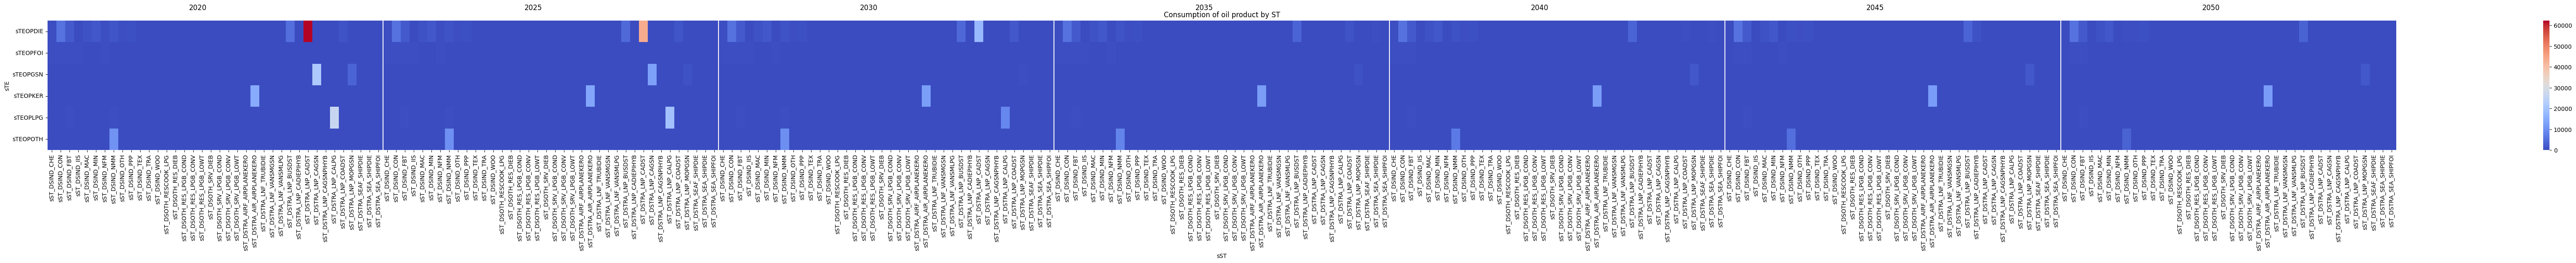

In [15]:

consumption_oilproduct_2020 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2020') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2025 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2025') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2030 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2030') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2035 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2035') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2040 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2040') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2045 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2045') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)
consumption_oilproduct_2050 = pd.DataFrame(data_results['vQSTInTE'][data_results['vQSTInTE'].sTE.str.startswith('sTEOP') & data_results['vQSTInTE'].sYear.str.startswith('y2050') ].groupby(['sTE','sST']).vQSTInTE.sum()).reset_index().pivot(index='sTE', columns='sST', values='vQSTInTE').fillna(0)

consumption_oilproduct = pd.concat([consumption_oilproduct_2020,consumption_oilproduct_2025,consumption_oilproduct_2030,consumption_oilproduct_2035,consumption_oilproduct_2040,consumption_oilproduct_2045,consumption_oilproduct_2050], axis=1)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(90, 4))
# Create a heatmap
sns.heatmap(consumption_oilproduct, cmap='coolwarm',vmin=0, vmax=consumption_oilproduct.max().max())

#Insert a separator between the years
plt.axvline(x=[38],  color='white')
plt.axvline(x=[76],  color='white')
plt.axvline(x=[114], color='white')
plt.axvline(x=[152], color='white')
plt.axvline(x=[190], color='white')
plt.axvline(x=[228], color='white')

# Add a label to each axvline
plt.text(16, -0.5, '2020', fontsize=12, color='black')
plt.text(54,  -0.5, '2025', fontsize=12, color='black')
plt.text(92,  -0.5, '2030', fontsize=12, color='black')
plt.text(130,  -0.5, '2035', fontsize=12, color='black')
plt.text(168,  -0.5, '2040', fontsize=12, color='black')
plt.text(206,  -0.5, '2045', fontsize=12, color='black')
plt.text(244,  -0.5, '2050', fontsize=12, color='black')

# Rotate the x axis labels
plt.title('Consumption of oil product by ST')
#move the title more to the top
plt.xlabel('sST')
plt.ylabel('sTE')

In [16]:
data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2020')]

,sST,sES,sYear,vEmiCO2ST
0,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_URBN,y2020,3236.260854
7,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_G50,y2020,994.451350
14,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_G500,y2020,1388.796718
21,sST_DSTRA_LNP_CADST,sES_DSTRA_PAS_URBN,y2020,7269.488197
28,sST_DSTRA_LNP_CADST,sES_DSTRA_PAS_G50,y2020,3181.967310
...,...,...,...,...
413,sST_DSTRA_LNF_TRUBICNG,sES_DSTRA_FRE_G500,y2020,8240.917166
420,sST_DSTRA_LNF_TRUBIELE,sES_DSTRA_FRE_G50,y2020,0.000000
427,sST_DSTRA_LNF_TRUBIELE,sES_DSTRA_FRE_G500,y2020,0.000000
434,sST_DSTRA_SEAF_SHIPDIE,sES_DSTRA_FRE_EXP,y2020,0.000000


In [9]:
data_results['vEmiCO2STPro'][(data_results['vEmiCO2STPro'].sST.str.startswith('sST_DSIND')) & (data_results['vEmiCO2STPro'].sYear=='y2020')]

,sST,sES,sYear,vEmiCO2STPro
980,sST_DSIND_IIS,sES_DSIND_IIS,y2020,0.0
987,sST_DSIND_CHE,sES_DSIND_CHE,y2020,0.0
994,sST_DSIND_NFM,sES_DSIND_NFM,y2020,0.0
1001,sST_DSIND_NMM,sES_DSIND_NMM,y2020,0.0
1008,sST_DSIND_TRA,sES_DSIND_TRA,y2020,0.0
1015,sST_DSIND_MAC,sES_DSIND_MAC,y2020,0.0
1022,sST_DSIND_MIN,sES_DSIND_MIN,y2020,0.0
1029,sST_DSIND_FBT,sES_DSIND_FBT,y2020,0.0
1036,sST_DSIND_PPP,sES_DSIND_PPP,y2020,0.0
1043,sST_DSIND_WOO,sES_DSIND_WOO,y2020,0.0


In [10]:
data_results['vEmiCO2ST'][(data_results['vEmiCO2ST'].sST.str.startswith('sST_DSTRA')) & (data_results['vEmiCO2ST'].sYear=='y2020')]

,sST,sES,sYear,vEmiCO2ST
0,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_URBN,y2020,3236.260854
7,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_G50,y2020,994.451350
14,sST_DSTRA_LNP_CAGSN,sES_DSTRA_PAS_G500,y2020,1388.796718
21,sST_DSTRA_LNP_CADST,sES_DSTRA_PAS_URBN,y2020,7269.488197
28,sST_DSTRA_LNP_CADST,sES_DSTRA_PAS_G50,y2020,3181.967310
...,...,...,...,...
413,sST_DSTRA_LNF_TRUBICNG,sES_DSTRA_FRE_G500,y2020,8240.917166
420,sST_DSTRA_LNF_TRUBIELE,sES_DSTRA_FRE_G50,y2020,0.000000
427,sST_DSTRA_LNF_TRUBIELE,sES_DSTRA_FRE_G500,y2020,0.000000
434,sST_DSTRA_SEAF_SHIPDIE,sES_DSTRA_FRE_EXP,y2020,0.000000


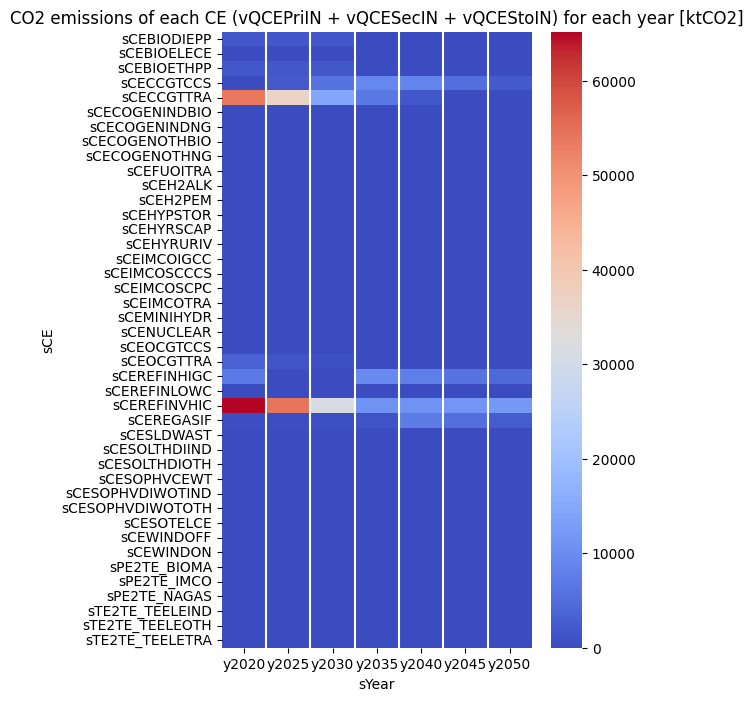

In [17]:

# Make a single heatmap that includes all the years
# Create a df that contains the emissions of each ST for each year
# The rows are the sST and the columns are sES
# Each intersection should be divided in 7 columns, one for each year
# The value of each intersection should be the emissions of the ST for that year
# The heatmap should have a color scale that goes from 0 to the maximum value of the emissions

# Create a df that contains the emissions of each ST for each year in the transport sector
emissions_2020 = vEmiCO2CE_HEATMAP_2020.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2025 = vEmiCO2CE_HEATMAP_2025.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2030 = vEmiCO2CE_HEATMAP_2030.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2035 = vEmiCO2CE_HEATMAP_2035.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2040 = vEmiCO2CE_HEATMAP_2040.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2045 = vEmiCO2CE_HEATMAP_2045.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')
emissions_2050 = vEmiCO2CE_HEATMAP_2050.pivot(index='sCE', columns='sYear', values='vEmiCO2CE')

# Create a df that contains the emissions of each ST for each year
emissions = pd.concat([emissions_2020, emissions_2025, emissions_2030, emissions_2035, emissions_2040, emissions_2045, emissions_2050], axis=1)

# replace NaN values with 0
# emissions.fillna(0, inplace=True)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(5, 8))
# Create a heatmap
sns.heatmap(emissions, cmap='coolwarm',vmin=0, vmax=emissions.max().max())
#Insert a separator between the years
plt.axvline(x=[1], color='white')
plt.axvline(x=[2], color='white')
plt.axvline(x=[3], color='white')
plt.axvline(x=[4], color='white')
plt.axvline(x=[5], color='white')
plt.axvline(x=[6], color='white')


# Rotate the x axis labels
plt.title('CO2 emissions of each CE (vQCEPriIN + vQCESecIN + vQCEStoIN) for each year [ktCO2]')
#move the title more to the top
plt.xlabel('sYear')
plt.ylabel('sCE')

plt.show()

In [12]:
data_results['vEmiCO2CE'][data_results['vEmiCO2CE'].sCE.isin(data_input['sCE_Ele'].sCE_Ele)]


,sCE,sYear,vEmiCO2CE
0,sCENUCLEAR,y2020,0.0
1,sCENUCLEAR,y2025,0.0
2,sCENUCLEAR,y2030,0.0
3,sCENUCLEAR,y2035,0.0
4,sCENUCLEAR,y2040,0.0
...,...,...,...
191,sCECOGENOTHBIO,y2030,0.0
192,sCECOGENOTHBIO,y2035,0.0
193,sCECOGENOTHBIO,y2040,0.0
194,sCECOGENOTHBIO,y2045,0.0


Text(0.5, 1.05, 'CO2 emissions of each TE (Transport + Losses) for each year [ktCO2]')

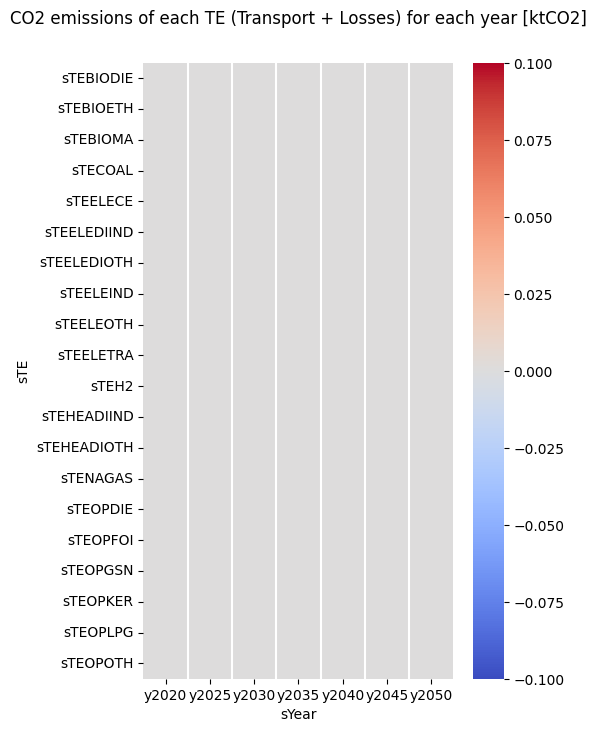

In [18]:

# Make a single heatmap that includes all the years
# Create a df that contains the emissions of each ST for each year
# The rows are the sST and the columns are sES
# Each intersection should be divided in 7 columns, one for each year
# The value of each intersection should be the emissions of the ST for that year
# The heatmap should have a color scale that goes from 0 to the maximum value of the emissions

# Create a df that contains the emissions of each ST for each year in the transport sector

emissions_2020 = vEmiCO2TE_HEATMAP_2020.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2025 = vEmiCO2TE_HEATMAP_2025.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2030 = vEmiCO2TE_HEATMAP_2030.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2035 = vEmiCO2TE_HEATMAP_2035.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2040 = vEmiCO2TE_HEATMAP_2040.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2045 = vEmiCO2TE_HEATMAP_2045.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')
emissions_2050 = vEmiCO2TE_HEATMAP_2050.pivot(index='sTE', columns='sYear', values='vEmiCO2TE')

# Create a df that contains the emissions of each ST for each year
emissions = pd.concat([emissions_2020, emissions_2025, emissions_2030, emissions_2035, emissions_2040, emissions_2045, emissions_2050], axis=1)

# replace NaN values with 0
emissions.fillna(0, inplace=True)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(5, 8))
# Create a heatmap
sns.heatmap(emissions, cmap='coolwarm',vmin=0, vmax=emissions.max().max())
#Insert a separator between the years
plt.axvline(x=[1], color='white')
plt.axvline(x=[2], color='white')
plt.axvline(x=[3], color='white')
plt.axvline(x=[4], color='white')
plt.axvline(x=[5], color='white')
plt.axvline(x=[6], color='white')

plt.title('CO2 emissions of each TE (Transport + Losses) for each year [ktCO2]', y=1.05)

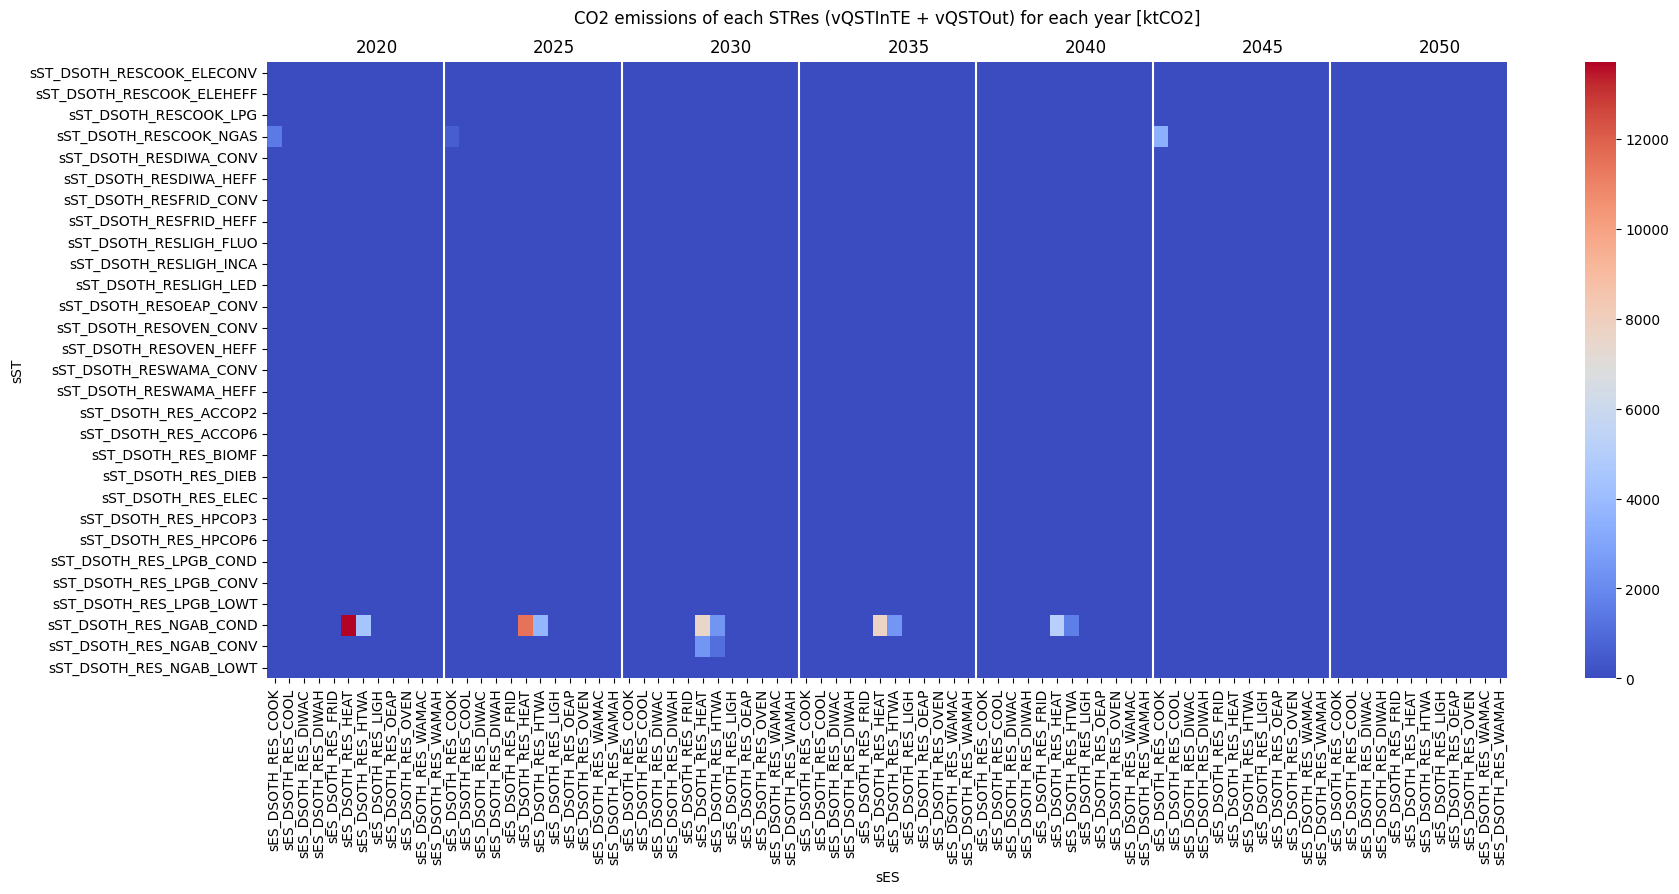

In [19]:
# Make a single heatmap that includes all the years
# Create a df that contains the emissions of each ST for each year
# The rows are the sST and the columns are sES
# Each intersection should be divided in 7 columns, one for each year
# The value of each intersection should be the emissions of the ST for that year
# The heatmap should have a color scale that goes from 0 to the maximum value of the emissions

# Create a df that contains the emissions of each ST for each year in the residential sector

emissions_2020_RES = vEmiCO2ST_HEATMAP_2020_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2025_RES = vEmiCO2ST_HEATMAP_2025_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2030_RES = vEmiCO2ST_HEATMAP_2030_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2035_RES = vEmiCO2ST_HEATMAP_2035_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2040_RES = vEmiCO2ST_HEATMAP_2040_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2045_RES = vEmiCO2ST_HEATMAP_2045_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2050_RES = vEmiCO2ST_HEATMAP_2050_RES.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_RES = pd.concat([emissions_2020_RES, emissions_2025_RES, emissions_2030_RES, emissions_2035_RES, emissions_2040_RES, emissions_2045_RES, emissions_2050_RES], axis=1)

# replace NaN values with 0
emissions_RES.fillna(0, inplace=True)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(20, 8))
# Create a heatmap
sns.heatmap(emissions_RES, cmap='coolwarm',vmin=0, vmax=emissions_RES.max().max())
#Insert a separator between the years
plt.axvline(x=[12], color='white')
plt.axvline(x=[24], color='white')
plt.axvline(x=[36], color='white')
plt.axvline(x=[48], color='white')
plt.axvline(x=[60], color='white')
plt.axvline(x=[72], color='white')



# Add a label to each axvline
plt.text(6, -0.5, '2020', fontsize=12, color='black')
plt.text(18,  -0.5, '2025', fontsize=12, color='black')
plt.text(30,  -0.5, '2030', fontsize=12, color='black')
plt.text(42,  -0.5, '2035', fontsize=12, color='black')
plt.text(54,  -0.5, '2040', fontsize=12, color='black')
plt.text(66,  -0.5, '2045', fontsize=12, color='black')
plt.text(78,  -0.5, '2050', fontsize=12, color='black')

# Rotate the x axis labels
plt.title('CO2 emissions of each STRes (vQSTInTE + vQSTOut) for each year [ktCO2]', y=1.05)
#move the title more to the top
plt.xlabel('sES')
plt.ylabel('sST')

plt.show()


In [ ]:
#Graph total STRes CO2 emissions for each year
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
emissions = [TotEmiSTRes_2020, TotEmiSTRes_2025, TotEmiSTRes_2030, TotEmiSTRes_2035, TotEmiSTRes_2040, TotEmiSTRes_2045, TotEmiSTRes_2050]
cap = data_input['pEmiCO2CapOth']
plt.plot(years, emissions, marker='o')
plt.plot(years, cap.pEmiCO2CapOth, marker='o')
plt.title('Total CO2 emissions of the Residential + Services Sectors for each year [MtCO2]')
plt.legend(['Total CO2 emissions', 'CO2 Cap'])
plt.xlabel('Year')
plt.ylabel('[MtCO2]')
plt.show()



In [ ]:
TotEmiSTRes_2045

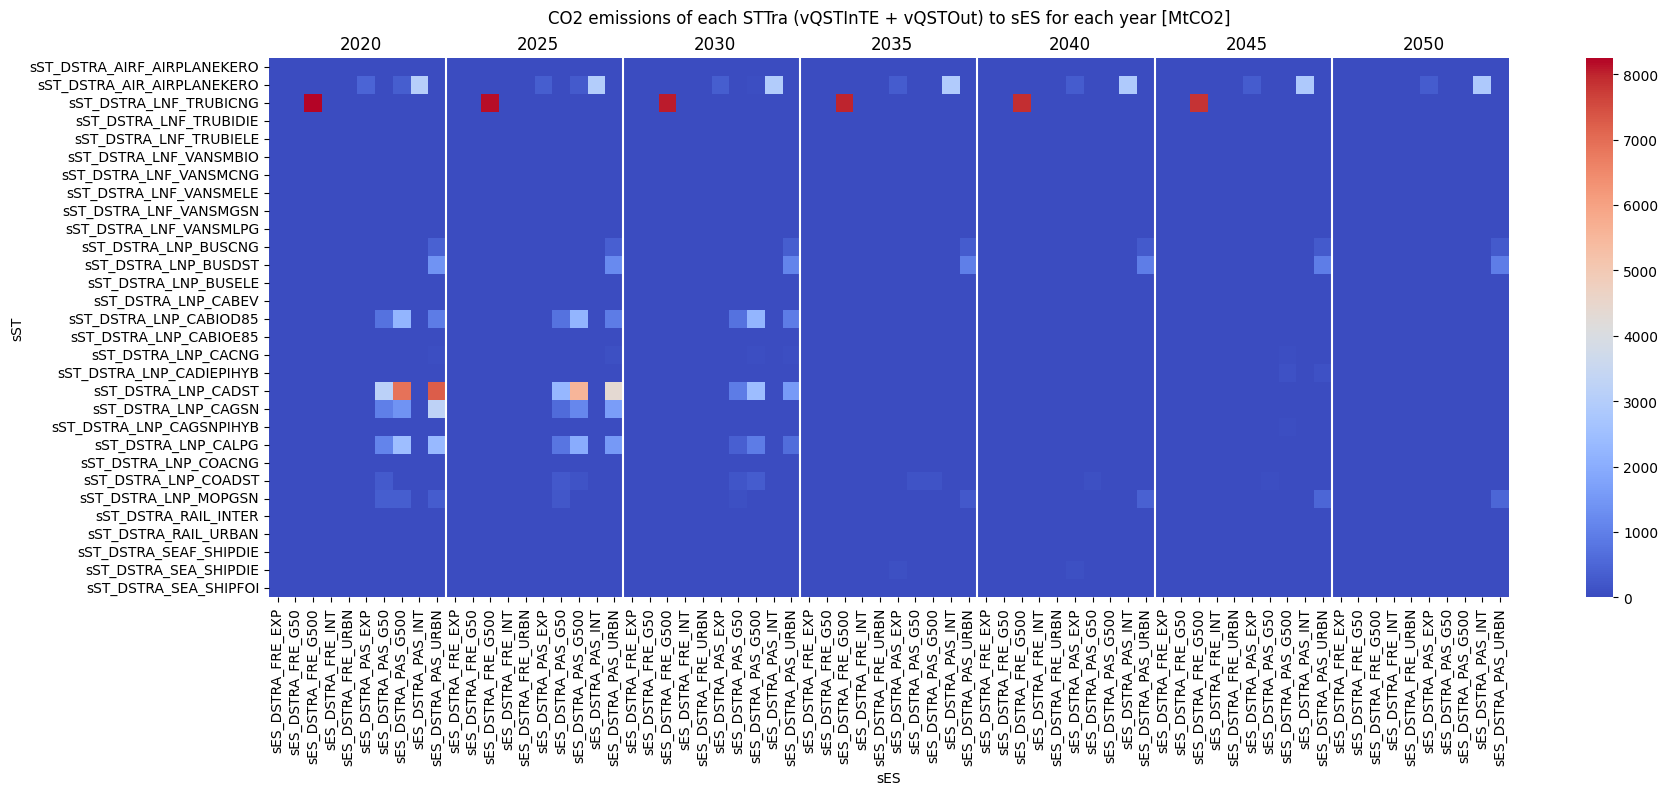

In [20]:

# Make a single heatmap that includes all the years
# Create a df that contains the emissions of each ST for each year
# The rows are the sST and the columns are sES
# Each intersection should be divided in 7 columns, one for each year
# The value of each intersection should be the emissions of the ST for that year
# The heatmap should have a color scale that goes from 0 to the maximum value of the emissions

# Create a df that contains the emissions of each ST for each year in the transport sector
emissions_2020_TRA = vEmiCO2ST_HEATMAP_2020_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')


# Create a df that contains the emissions of each ST for each year
emissions_2025_TRA = vEmiCO2ST_HEATMAP_2025_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_2030_TRA = vEmiCO2ST_HEATMAP_2030_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_2035_TRA = vEmiCO2ST_HEATMAP_2035_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_2040_TRA = vEmiCO2ST_HEATMAP_2040_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_2045_TRA = vEmiCO2ST_HEATMAP_2045_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_2050_TRA = vEmiCO2ST_HEATMAP_2050_TRA.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions = pd.concat([emissions_2020_TRA, emissions_2025_TRA, emissions_2030_TRA, emissions_2035_TRA, emissions_2040_TRA, emissions_2045_TRA, emissions_2050_TRA], axis=1)

# replace NaN values with 0
emissions.fillna(0, inplace=True)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(20, 7))
# Create a heatmap
sns.heatmap(emissions, cmap='coolwarm',vmin=0, vmax=emissions.max().max())
#Insert a separator between the years
plt.axvline(x=[10], color='white')
plt.axvline(x=[20], color='white')
plt.axvline(x=[30], color='white')
plt.axvline(x=[40], color='white')
plt.axvline(x=[50], color='white')
plt.axvline(x=[60], color='white')

# Add a label to each axvline
plt.text(4, -0.5, '2020', fontsize=12, color='black')
plt.text(14,  -0.5, '2025', fontsize=12, color='black')
plt.text(24,  -0.5, '2030', fontsize=12, color='black')
plt.text(34,  -0.5, '2035', fontsize=12, color='black')
plt.text(44,  -0.5, '2040', fontsize=12, color='black')
plt.text(54,  -0.5, '2045', fontsize=12, color='black')
plt.text(64,  -0.5, '2050', fontsize=12, color='black')

# Rotate the x axis labels
plt.title('CO2 emissions of each STTra (vQSTInTE + vQSTOut) to sES for each year [MtCO2]', y=1.05)
#move the title more to the top
plt.xlabel('sES')
plt.ylabel('sST')

plt.show()

In [ ]:
#Graph total STTra CO2 emissions for each year
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
emissions = [TotEmiSTTra_2020, TotEmiSTTra_2025, TotEmiSTTra_2030, TotEmiSTTra_2035, TotEmiSTTra_2040, TotEmiSTTra_2045, TotEmiSTTra_2050]
cap = data_input['pEmiCO2CapTra']

plt.plot(years, emissions, marker='o')
plt.plot(years, cap.pEmiCO2CapTra, marker='o')
plt.title('Total CO2 emissions of the Transport Sector for each year [MtCO2]')
plt.legend(['Total CO2 emissions', 'CO2 Cap'])
plt.xlabel('Year')
plt.ylabel('[MtCO2]')
plt.show()



In [49]:
# Make a single heatmap that includes all the years
# Create a df that contains the emissions of each ST for each year
# The rows are the sST and the columns are sES
# Each intersection should be divided in 7 columns, one for each year
# The value of each intersection should be the emissions of the ST for that year
# The heatmap should have a color scale that goes from 0 to the maximum value of the emissions

# Create a df that contains the emissions of each ST for each year in the industrial sector

emissions_2020_IND = vEmiCO2ST_HEATMAP_2020_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2025_IND = vEmiCO2ST_HEATMAP_2025_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2030_IND = vEmiCO2ST_HEATMAP_2030_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2035_IND = vEmiCO2ST_HEATMAP_2035_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2040_IND = vEmiCO2ST_HEATMAP_2040_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2045_IND = vEmiCO2ST_HEATMAP_2045_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')
emissions_2050_IND = vEmiCO2ST_HEATMAP_2050_IND.pivot(index='sST', columns='sES', values='vEmiCO2ST')

# Create a df that contains the emissions of each ST for each year
emissions_IND = pd.concat([emissions_2020_IND, emissions_2025_IND, emissions_2030_IND, emissions_2035_IND, emissions_2040_IND, emissions_2045_IND, emissions_2050_IND], axis=1)

# replace NaN values with 0
emissions_IND.fillna(0, inplace=True)

# Increase the size of the plot in sucha  way that all the years are visible an sST and sES are readable
plt.figure(figsize=(25, 3))
# Create a heatmap
sns.heatmap(emissions_IND, cmap='coolwarm',vmin=0, vmax=emissions_IND.max().max())
#Insert a separator between the years
plt.axvline(x=[13], color='white')
plt.axvline(x=[26], color='white')
plt.axvline(x=[39], color='white')
plt.axvline(x=[52], color='white')
plt.axvline(x=[65], color='white')
plt.axvline(x=[78], color='white')


# Add a label to each axvline
plt.text(6, -0.5, '2020', fontsize=12, color='black')
plt.text(18,  -0.5, '2025', fontsize=12, color='black')
plt.text(30,  -0.5, '2030', fontsize=12, color='black')
plt.text(42,  -0.5, '2035', fontsize=12, color='black')
plt.text(54,  -0.5, '2040', fontsize=12, color='black')
plt.text(66,  -0.5, '2045', fontsize=12, color='black')
plt.text(78,  -0.5, '2050', fontsize=12, color='black')

# Rotate the x axis labels
plt.title('CO2 emissions of each STInd (vQSTInTE + vQSTOut) for each year [MtCO2]', y=1.07)
#move the title more to the top
plt.xlabel('sES')
plt.ylabel('sST')

plt.show()

NameError: name 'vEmiCO2ST_HEATMAP_2020_IND' is not defined

In [48]:
#Graph total STTra CO2 emissions for each year
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
emissions_Pro = [TotEmiSTInd_2020_PRO, TotEmiSTInd_2025_PRO, TotEmiSTInd_2030_PRO, TotEmiSTInd_2035_PRO, TotEmiSTInd_2040_PRO, TotEmiSTInd_2045_PRO, TotEmiSTInd_2050_PRO]
emissions_TE = [TotEmiSTInd_2020_TE, TotEmiSTInd_2025_TE, TotEmiSTInd_2030_TE, TotEmiSTInd_2035_TE, TotEmiSTInd_2040_TE, TotEmiSTInd_2045_TE, TotEmiSTInd_2050_TE]  
cap_pro = data_input['pEmiCO2CapIndPro']
cap_te = data_input['pEmiCO2CapIndTE']

plt.plot(years, emissions_Pro, marker='o',color='red')
plt.plot(years, emissions_TE, marker='o',color='b')
plt.plot(years, cap_te.pEmiCO2CapIndTE, marker='o',linestyle='dashed',color='b')
plt.plot(years, cap_pro.pEmiCO2CapIndPro, marker='o',linestyle='dashed',color='r')
plt.title('Total CO2 emissions of the Transport Sector for each year [MtCO2]')
plt.legend(['Total CO2 emissions Pro', 'Total CO2 emissions TE', 'CO2 Cap TE', 'CO2 Cap Pro'])
plt.xlabel('Year')
plt.ylabel('[MtCO2]')
plt.show()

NameError: name 'TotEmiSTInd_2020_PRO' is not defined

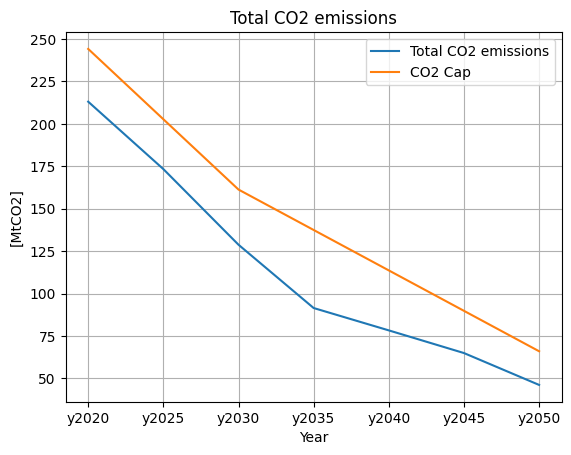

In [47]:
Total_CO2_Emmisions = data_results['vEmiCO2Tot']
CapTotal = data_input['pEmiCO2Cap']

plt.plot(Total_CO2_Emmisions['sYear'], Total_CO2_Emmisions['vEmiCO2Tot'])
plt.plot(CapTotal['sYear'], CapTotal['pEmiCO2Cap'])
plt.title('Total CO2 emissions')
plt.legend(['Total CO2 emissions', 'CO2 Cap'])
plt.xlabel('Year')
plt.ylabel('[MtCO2]')
plt.grid()
plt.show()


NOX

In [20]:
data_results['vCECapExc'][data_results['vCECapExc'].vCECapExc!=0]

,sCE,sYear,vCECapExc
252,sPE2TE_IMCO,y2020,848.1
253,sPE2TE_IMCO,y2025,798.2
254,sPE2TE_IMCO,y2030,748.3
255,sPE2TE_IMCO,y2035,698.4
256,sPE2TE_IMCO,y2040,648.5
257,sPE2TE_IMCO,y2045,598.6
258,sPE2TE_IMCO,y2050,548.7
259,sPE2TE_NAGAS,y2020,848.1
260,sPE2TE_NAGAS,y2025,798.2
261,sPE2TE_NAGAS,y2030,748.3


In [19]:
# SEE THE VALUES OF data_results['vSTCapExc'] DIFFERENT FROM ZERO

data_results['vSTCapExc'][data_results['vSTCapExc'].vSTCapExc!=0]

,sST,sYear,vSTCapExc
98,sST_DSTRA_LNP_BUSELE,y2020,1.117219
126,sST_DSTRA_RAIL_URBAN,y2020,8.535912
127,sST_DSTRA_RAIL_URBAN,y2025,0.246661
128,sST_DSTRA_RAIL_URBAN,y2030,1.857882
129,sST_DSTRA_RAIL_URBAN,y2035,2.745627
130,sST_DSTRA_RAIL_URBAN,y2040,2.266191
131,sST_DSTRA_RAIL_URBAN,y2045,1.593680
132,sST_DSTRA_RAIL_URBAN,y2050,1.601019
202,sST_DSTRA_LNF_TRUBIELE,y2050,0.530193
329,sST_DSOTH_RESFRID_HEFF,y2020,51.142432
